---

<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #3A405A;">📊 EarthQuake Data Analysis</h1>

<h2 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Luc ida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align:  center; color:'white'; font-size:16px ">Earthquake Prediction Using LR, RF, and XGBoost Models
</h2>

---



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Introduction</h3>


<h5 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #6B6E70;"> 

This dataset provides detailed information on 1,137 earthquakes from around the world. It includes a wide range of attributes such as magnitude, location details, time, and various seismological measurements. The data was collected using the EveryEarthquake API from RapidAPI, offering researchers, seismologists, and data enthusiasts a rich resource for analysis, machine learning projects, and geological studies.

Key features of this dataset include:

Comprehensive coverage of 1,137 earthquake events
43 attributes for each earthquake, including geological, geographical, and temporal data
Detailed location information, from continent down to locality level
Seismological measurements such as magnitude, depth, and intensity scales
Metadata on the reporting and status of each earthquake event 

In this project, we aim to predict earthquakes using various machine learning models, namely Logistic Regression (LR), Random Forest (RF), and XGBoost (XGB). 
We focus on three target variables: `Magnitude`, `Type`, and `Depth`.

</h5>


In [4]:
# # Data columns Description file 
# Descriptor = open('earthquakes_column_descriptors.txt', 'r')
# while True:
#     line =  Descriptor.readline()
#     if not line :
#         break 
#     print(line)
# Descriptor.close()


In [5]:
import pandas as pd 
col = pd.read_csv("earthquakes_column_descriptors.txt",sep =':')
col

Column Descriptors                                         Unnamed: 1
0                  id       Unique identifier for each earthquake event.
1           magnitude   The strength of the earthquake on the Richter...
2                type   Type of seismic event (earthquake, explosion,...
3               title   Title of the earthquake event (place and magn...
4                date                 Date when the earthquake occurred.
5                time                 Time when the earthquake occurred.
6             updated              Last updated timestamp for the event.
7                 url            Link to the earthquake event's details.
8           detailUrl                            Additional details URL.
9                felt   Number of people who reported feeling the ear...
10                cdi   Community Determined Intensity, how strongly ...
11                mmi   Modified Mercalli Intensity, scale used to me...
12              alert          Alert level (green, yellow, orange, red).
13             status         Status of the event (reviewed, automatic).
14            tsunami         Tsunami risk flag (0 = no risk, 1 = risk).
15                sig   Significance of the earthquake, based on magn...
16                net              Network that detected the earthquake.
17               code                      Code assigned by the network.
18                ids   IDs of other events related to the same earth...
19            sources                        Data sources for the event.
20              types        Event types associated with the earthquake.
21                nst   Number of seismic stations that recorded the ...
22               dmin          Minimum distance to the earthquake event.
23                rms   Root mean square of signal, used to measure e...
24                gap   Data gap between stations detecting the earth...
25            magType                  Type of magnitude (e.g., mb, Ms).
26       geometryType   Type of geometry for the location (usually "P...
27              depth             Depth of the earthquake in kilometers.
28           latitude            Latitude of the earthquake's epicenter.
29          longitude           Longitude of the earthquake's epicenter.
30              place    General location description of the earthquake.
31         distanceKM   Distance from the nearest populated place in ...
32          placeOnly   Flag indicating if only place information is ...
33           location   Full address or description of the earthquake...
34          continent           Continent where the earthquake occurred.
35            country             Country where the earthquake occurred.
36        subnational   Subnational region where the earthquake occur...
37               city                    City closest to the earthquake.
38           locality                     Locality or neighborhood name.
39           postcode                  Postal code of the affected area.
40         what3words      Unique 3-word code representing the location.
41           timezone                        Timezone of the earthquake.
42    locationDetails   Additional details about the earthquake’s loc...


<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 20px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Brief introduction about the analysis.
    <h5 style="font-size: 18px; color:#e13661	 ;font-family: 'Verdana'"> --> we will do prediction of three target cols 
    - magnitude
    - alert 
    - tsunami </h5>
    <h5 style="font-size: 20px; color:#3A405A;font-family: 'Verdana'">Table of Contents:</h5>
    <ol style="font-size: 20px; color:#3A405A">
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#introduction">Importing Librarires</a></li>
    <li><a href="#data-loading-and-inspection">Data Loading and Inspection</a></li>
    <li><a href="#data-cleaning">Data Cleaning and preprocessing</a></li>
    <li><a href="#exploratory-data-analysis-eda">Exploratory Data Analysis (EDA)</a></li>
    <li><a href="#feature-engineering">Feature Engineering</a></li>
    <li><a href="#modeling">Data Modeling</a></li>
    <li><a href="#evaluation">Model Evaluation</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ol>
    </p></div>






<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Importing Libraries</h3>



In [6]:
import pandas as pd 
import numpy as np 

# visulization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import  plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
# for map visualization 
import folium
import folium.map
from folium.plugins import MarkerCluster


# modelling and evaluation libraries 
from sklearn.preprocessing import  StandardScaler , MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.decomposition import  PCA
from sklearn.ensemble import  RandomForestClassifier , RandomForestRegressor
from sklearn.metrics import confusion_matrix,  accuracy_score, classification_report, mean_squared_error, r2_score,ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor, XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter



import warnings 
warnings.filterwarnings('ignore')



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Data Loading and Inspection</h3>


In [7]:
df = pd.read_csv('earthquakes.csv')
df.head()

id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://earthquake.usgs.gov/earthquakes/eventp...   
2  https://earthquake.usgs.gov/earthquakes/eventp...   
3  https://earthquake.usgs.gov/earthquakes/eventp...   
4  https://earthquake.usgs.gov/earthquakes/eventp...   

                                           detailUrl  felt  ...  \
0  https://earthquake.usgs.gov/earthquakes/feed/v...  1893  ...   
1  https://earthquake.usgs.gov/fdsnws/event/1/que...  2042  ...   
2  https://earthquake.usgs.gov/fdsnws/event/1/que...  1580  ...   
3  https://earthquake.usgs.gov/fdsnws/event/1/que...     5  ...   
4  https://earthquake.usgs.gov/earthquakes/feed/v...     4  ...   

                  location      continent                         country  \
0           Ackerly, Texas  North America  United States of America (the)   
1           Ackerly, Texas  North America  United States of America (the)   
2               Malibu, CA  North America  United States of America (the)   
3  Whites City, New Mexico  North America  United States of America (the)   
4  Whites City, New Mexico  North America  United States of America (the)   

  subnational            city             locality postcode  \
0       Texas  Tarzan-Lenorah       Tarzan-Lenorah  79783.0   
1       Texas  Tarzan-Lenorah       Tarzan-Lenorah  79331.0   
2  California     Los Angeles  Agoura Hills-Malibu  90265.0   
3       Texas        Van Horn             Van Horn      NaN   
4       Texas        Van Horn             Van Horn      NaN   

                   what3words timezone  \
0    landmass.perkily.affords     -300   
1    escalator.grownups.dwell     -300   
2    clocking.uploaded.issuer     -420   
3     sailboats.sawn.speeding     -300   
4  spinners.downtime.computes     -300   

                                     locationDetails  
0  [{'id': '80684', 'wikidataId': '', 'name': '79...  
1  [{'id': '89341', 'wikidataId': '', 'name': '48...  
2  [{'id': '93478', 'wikidataId': 'Q844837', 'nam...  
3  [{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor...  
4  [{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor...  

[5 rows x 43 columns]

In [8]:
cols= ['magnitude', 'type', 'title', 'date', 'time', 'updated', 'url',
       'detailUrl', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig',
       'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap',
       'magType', 'geometryType', 'depth', 'latitude', 'longitude', 'place',
       'distanceKM', 'placeOnly', 'location', 'continent', 'country',
       'subnational', 'city', 'locality', 'postcode', 'what3words', 'timezone',
       'locationDetails']
for i,col in enumerate(cols):
    print(col)
    print(df[col].unique())

magnitude
[4.8  5.1  3.7  3.9  4.1  3.23 3.43 3.44 4.69 3.5  3.8  3.3  3.35 3.94
 3.45 3.09 4.28 3.17 3.47 3.32 3.1  3.   3.46 3.14 3.4  3.6  3.31 3.2
 4.3  4.2  3.29 3.61 4.4  4.39 3.66 4.44 3.78 3.64 3.58 4.06 3.22 4.6
 5.22 3.12 3.51 4.89 4.47 4.5  4.   3.56 3.48 3.01 5.2  6.4  5.7  5.4
 5.9  5.5  5.6  5.3  5.8  7.   4.9  6.1  6.5  7.1  5.   6.3  7.4  6.2
 7.5  6.   6.6  4.7  3.86 3.24 4.09 3.59 6.8  6.7  6.9  7.6  5.06 7.2
 4.26 3.68]
type
['earthquake']
title
['M 4.8 - 33 km WSW of Ackerly, Texas'
 'M 5.1 - 34 km WSW of Ackerly, Texas' 'M 3.7 - 6 km N of Malibu, CA'
 'M 3.9 - 58 km S of Whites City, New Mexico'
 'M 4.1 - 60 km S of Whites City, New Mexico'
 'M 3.2 - 6 km N of Malibu, CA' 'M 3.4 - 5 km N of Malibu, CA'
 'M 3.4 - 7 km N of Malibu, CA' 'M 4.7 - 6 km N of Malibu, CA'
 'M 3.5 - 7 km NW of Hiko, Nevada'
 'M 3.8 - 56 km S of Whites City, New Mexico'
 'M 3.3 - 61 km SSW of Whites City, New Mexico'
 'M 3.8 - 57 km S of Whites City, New Mexico'
 'M 3.9 - 61 km S of Whites C

In [9]:
df.columns

Index(['id', 'magnitude', 'type', 'title', 'date', 'time', 'updated', 'url',
       'detailUrl', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig',
       'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap',
       'magType', 'geometryType', 'depth', 'latitude', 'longitude', 'place',
       'distanceKM', 'placeOnly', 'location', 'continent', 'country',
       'subnational', 'city', 'locality', 'postcode', 'what3words', 'timezone',
       'locationDetails'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   time             1137 non-null   int64  
 6   updated          1137 non-null   int64  
 7   url              1137 non-null   object 
 8   detailUrl        1137 non-null   object 
 9   felt             1137 non-null   int64  
 10  cdi              1137 non-null   int64  
 11  mmi              1137 non-null   int64  
 12  alert            764 non-null    object 
 13  status           1137 non-null   object 
 14  tsunami          1137 non-null   int64  
 15  sig              1137 non-null   int64  
 16  net              1137 non-null   object 
 17  code          

In [11]:
df.describe()

magnitude          time       updated           felt          cdi  \
count  1137.000000  1.137000e+03  1.137000e+03    1137.000000  1137.000000   
mean      4.856675  1.712109e+12  1.716593e+12     414.408091     2.925242   
std       1.047840  1.143033e+10  9.671955e+09    5746.971362     2.562707   
min       3.000000  1.687542e+12  1.693083e+12       0.000000     0.000000   
25%       3.800000  1.701663e+12  1.707609e+12       0.000000     0.000000   
50%       5.300000  1.713810e+12  1.719958e+12       2.000000     3.000000   
75%       5.600000  1.722885e+12  1.725384e+12      24.000000     5.000000   
max       7.600000  1.726661e+12  1.726672e+12  183786.000000     9.000000   

               mmi      tsunami          sig          nst         dmin  \
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000   
mean      4.320141     0.059807   432.698329   115.094107     1.342604   
std       1.453949     0.237232   256.177844    91.877870     1.704364   
min       1.000000     0.000000   138.000000     0.000000     0.000000   
25%       4.000000     0.000000   234.000000    37.000000     0.100000   
50%       4.000000     0.000000   449.000000   102.000000     0.680000   
75%       5.000000     0.000000   518.000000   157.000000     2.061000   
max       9.000000     1.000000  2419.000000   619.000000    12.457000   

               rms          gap        depth     latitude    longitude  \
count  1137.000000  1137.000000  1137.000000  1137.000000  1137.000000   
mean      0.585974    55.055286    41.287300    27.308909    -3.930635   
std       0.308556    37.609237    87.866489    20.133139   118.043697   
min       0.000000     0.000000    -0.250000   -43.706400  -179.807000   
25%       0.300000    30.000000     7.550000    24.195400  -104.452000   
50%       0.630000    49.000000    10.000000    31.667700   -68.682000   
75%       0.780000    68.000000    34.723000    37.497600   126.628000   
max       2.520000   256.000000   639.503000    68.176100   179.972000   

        distanceKM      postcode     timezone  
count  1137.000000    197.000000  1137.000000  
mean     52.289358  83086.131980    21.741425  
std      56.027469  12812.555204   440.864430  
min       0.000000   8833.000000  -720.000000  
25%      15.000000  79331.000000  -360.000000  
50%      37.000000  79772.000000  -180.000000  
75%      61.000000  92530.000000   480.000000  
max     298.000000  99827.000000   780.000000


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Data Cleaning and Preprocessing</h3>



<div style="background-color: #E8EAF6; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.5em;">
    Steps: 
    <li><a href="#handling-missing-data">Initial Feature Selection</a></li>
    <li><a href="#handling-missing-data">Handling Missing Data</a></li>
    <li><a href="#removing-duplicates">Removing Duplicates</a></li>
    <li><a href="#dealing-with-outliers">Dealing with Outliers</a></li>
    <li><a href="#data-transformation">Data Transformation</a></li>
    <li><a href="#feature-scaling">Feature Scaling</a></li>
    <li><a href="#encoding-categorical-data">Encoding Categorical Data</a></li>    </p>
</div>


<h4 style="font-family: 'Verdana'; color: #3A405A;">*Initial Feature Selection</h4>

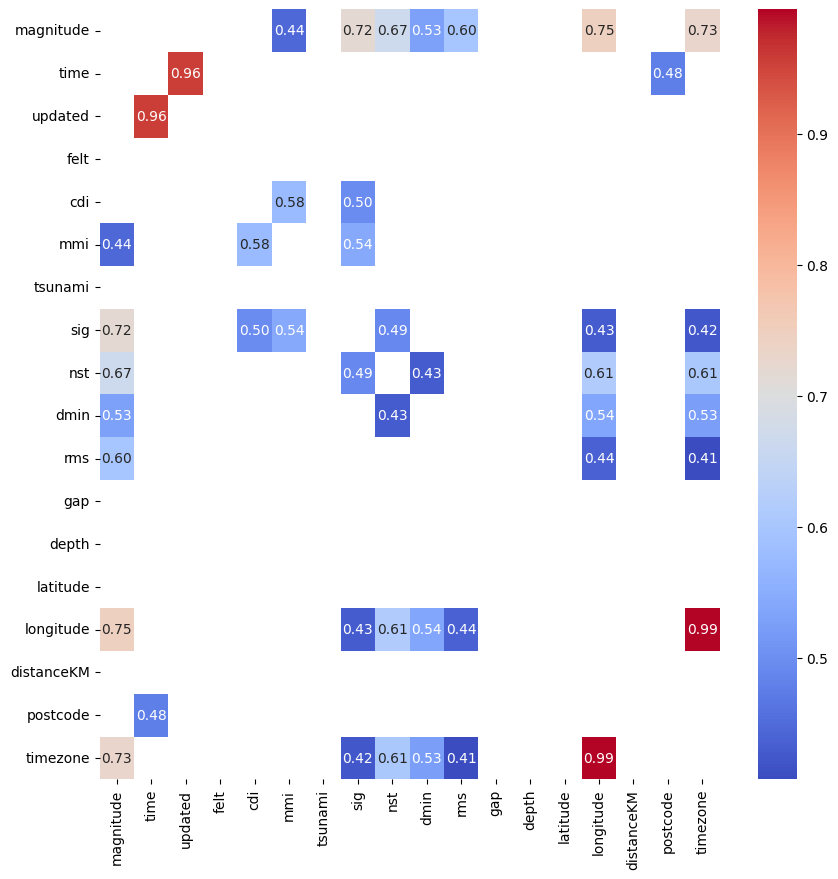

In [12]:
# get correlation matrix
corr_matrx = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
# Applying Threshold bases mask
threshold = 0.4
mask = (corr_matrx < threshold) #and  (corr_matrx != 1)

# mask = np.triu(np.ones_like(df, dtype=bool)) # upper triangle mask 

sns.heatmap(corr_matrx[corr_matrx != 1],annot=True,fmt='0.2f',cmap='coolwarm',mask=mask)
plt.show()


In [13]:
# Dropping unusful Features
useful_col = ['magnitude','felt','cdi','mmi','alert','tsunami','sig','rms', 'gap','location',
              'magType', 'depth', 'latitude', 'longitude'] # --> target ['alert'] ['tsunami'] ['magnitude]

unuseful_col = ['type', 'date','time','updated','url', 'detailurl','net','code','sources','types','nst', 'dmin','gap',
 'place','distanceKM', 'placeOnly', 'continent', 'country','subnational', 'city', 'locality',
 'postcode', 'what3words', 'timezone','locationDetails']

<h4 style="font-family: 'Verdana'; color: #3A405A;">* Handling Missing Data</h4>

In [14]:
# print Missing data number
print('Missing Data = ',df.isna().sum().sum())

Missing Data =  2805


In [15]:
# # Handle Missing Data 
# null_col = df.isna().sum() # columns that has null values
# # null_col[[12]] 
# list_col_missing = []
# # get col with Missings
# print("col with Missings: ")
# for col,val in enumerate(null_col):
#     if val !=0:
#         list_col_missing.append(null_col[[col]].index[0])
#         print(null_col[[col]].index[0])

# another shorter solution 

# lambda funcion to get columns with missing data
missing_cols = df.columns[df.apply(lambda x : x.isnull().sum() != 0)].to_list()
missing_cols

['alert', 'continent', 'country', 'subnational', 'city', 'postcode']

<div style="background-color: #FFF3E0; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733;">⚠️ Note:</h3>
    <p style="font-size: 15px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    For the purpose of this analysis, I will focus on filling missing values in the alert column, as it is a key feature for modeling and prediction. 
    The other columns with missing data, such as continent, country, subnational, city, and postcode, will not be imputed at this stage, as they are not as critical for the analysis or may not significantly impact the target variable. 
    !</p>
</div>

<div style="background-color: #D3D3D3; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(210, 210, 210, 0.5);color: #000000;">
    
<h3 style="color: #000000;">Info:</h3>

<p style="color: #000000;">
**Steps:**

1. **Use the Mean when:**
   - Your data is normally distributed.
   - You want a single representative value for decision-making.

2. **Use Percentiles when:**
   - Your data has outliers or is skewed.
   - You want to define categories that represent different levels of risk or severity.
</p>
</div>


<h4 style="color: #3A470A;">- set all  values to lowercase characters
</h4>

In [16]:
# # array(['green', 'Green', 'yellow', 'red', 'Yellow', 'Orange', 'orange'],
# # Mapping to fix alert values
# df['alert'] = df['alert'].map({
#     'Green' : 'green',
#     'Yellow' :'yellow',
#     'Orange' :'orange',
#     'Red' : 'red'
# })

# another shorter solution 

df['alert'] = df['alert'].str.lower()
df.alert.unique()

array(['green', nan, 'yellow', 'red', 'orange'], dtype=object)

In [17]:
df['status'] = df['status'].str.lower()
df.status.unique()

array(['reviewed', 'automatic'], dtype=object)

<h4 style="color: #3A470A;">- Get threshold using mean
</h4>

In [18]:
print("Mean of Green Alert Magnitude  = ",df[df.alert == 'green']['magnitude'].mean())
print("Mean of Red Alert Magnitude  = ",df[df.alert == 'red']['magnitude'].mean())
print("Mean of Orange Alert Magnitude  = ",df[df.alert == 'orange']['magnitude'].mean())
print("Mean of Yellow Alert Magnitude  = ",df[df.alert == 'yellow']['magnitude'].mean())

Mean of Green Alert Magnitude  =  5.388537271448664
Mean of Red Alert Magnitude  =  6.888888888888889
Mean of Orange Alert Magnitude  =  6.3
Mean of Yellow Alert Magnitude  =  6.273684210526317


<h4 style="color: #3A470A;">- Get threshold using percentile
</h4>

In [19]:
percentiles = df['magnitude'].quantile([0.25, 0.5, 0.75, 0.9]).values
percentiles[0] ,percentiles[1],percentiles[2],percentiles[3]

(3.8, 5.3, 5.6, 6.0)

In [20]:
# Function to fill NaN based on magnitude. 
def impute_alert_based_on_magnitude(row):
    if pd.isna(row['alert']):
        if  row['magnitude'] >= percentiles[3]: # Top 10% as Red
            return 'red'
        elif row['magnitude'] >= percentiles[2]: # Top 25% as Orange
            return 'orange'
        elif row['magnitude'] >= percentiles[1]: # Median as Yellow
            return 'yellow'
        else:                                    # Bottom 50% as Green
            return 'green'
    else:
        return row['alert']

# apply the function 
df['alert'] = df.apply(impute_alert_based_on_magnitude,axis=1)

In [21]:
df['alert'].isna().sum()

0

<h4 style="font-family: 'Verdana'; color: #3A405A;">*Removing Duplicates</h4>

In [22]:
print('Duplicated Data = ',df.duplicated().sum())
# Drop the Duplicates
df = df.drop_duplicates()

Duplicated Data =  337


<h4 style="font-family: 'Verdana'; color: #3A405A;">*Dealing with Outliers</h4>

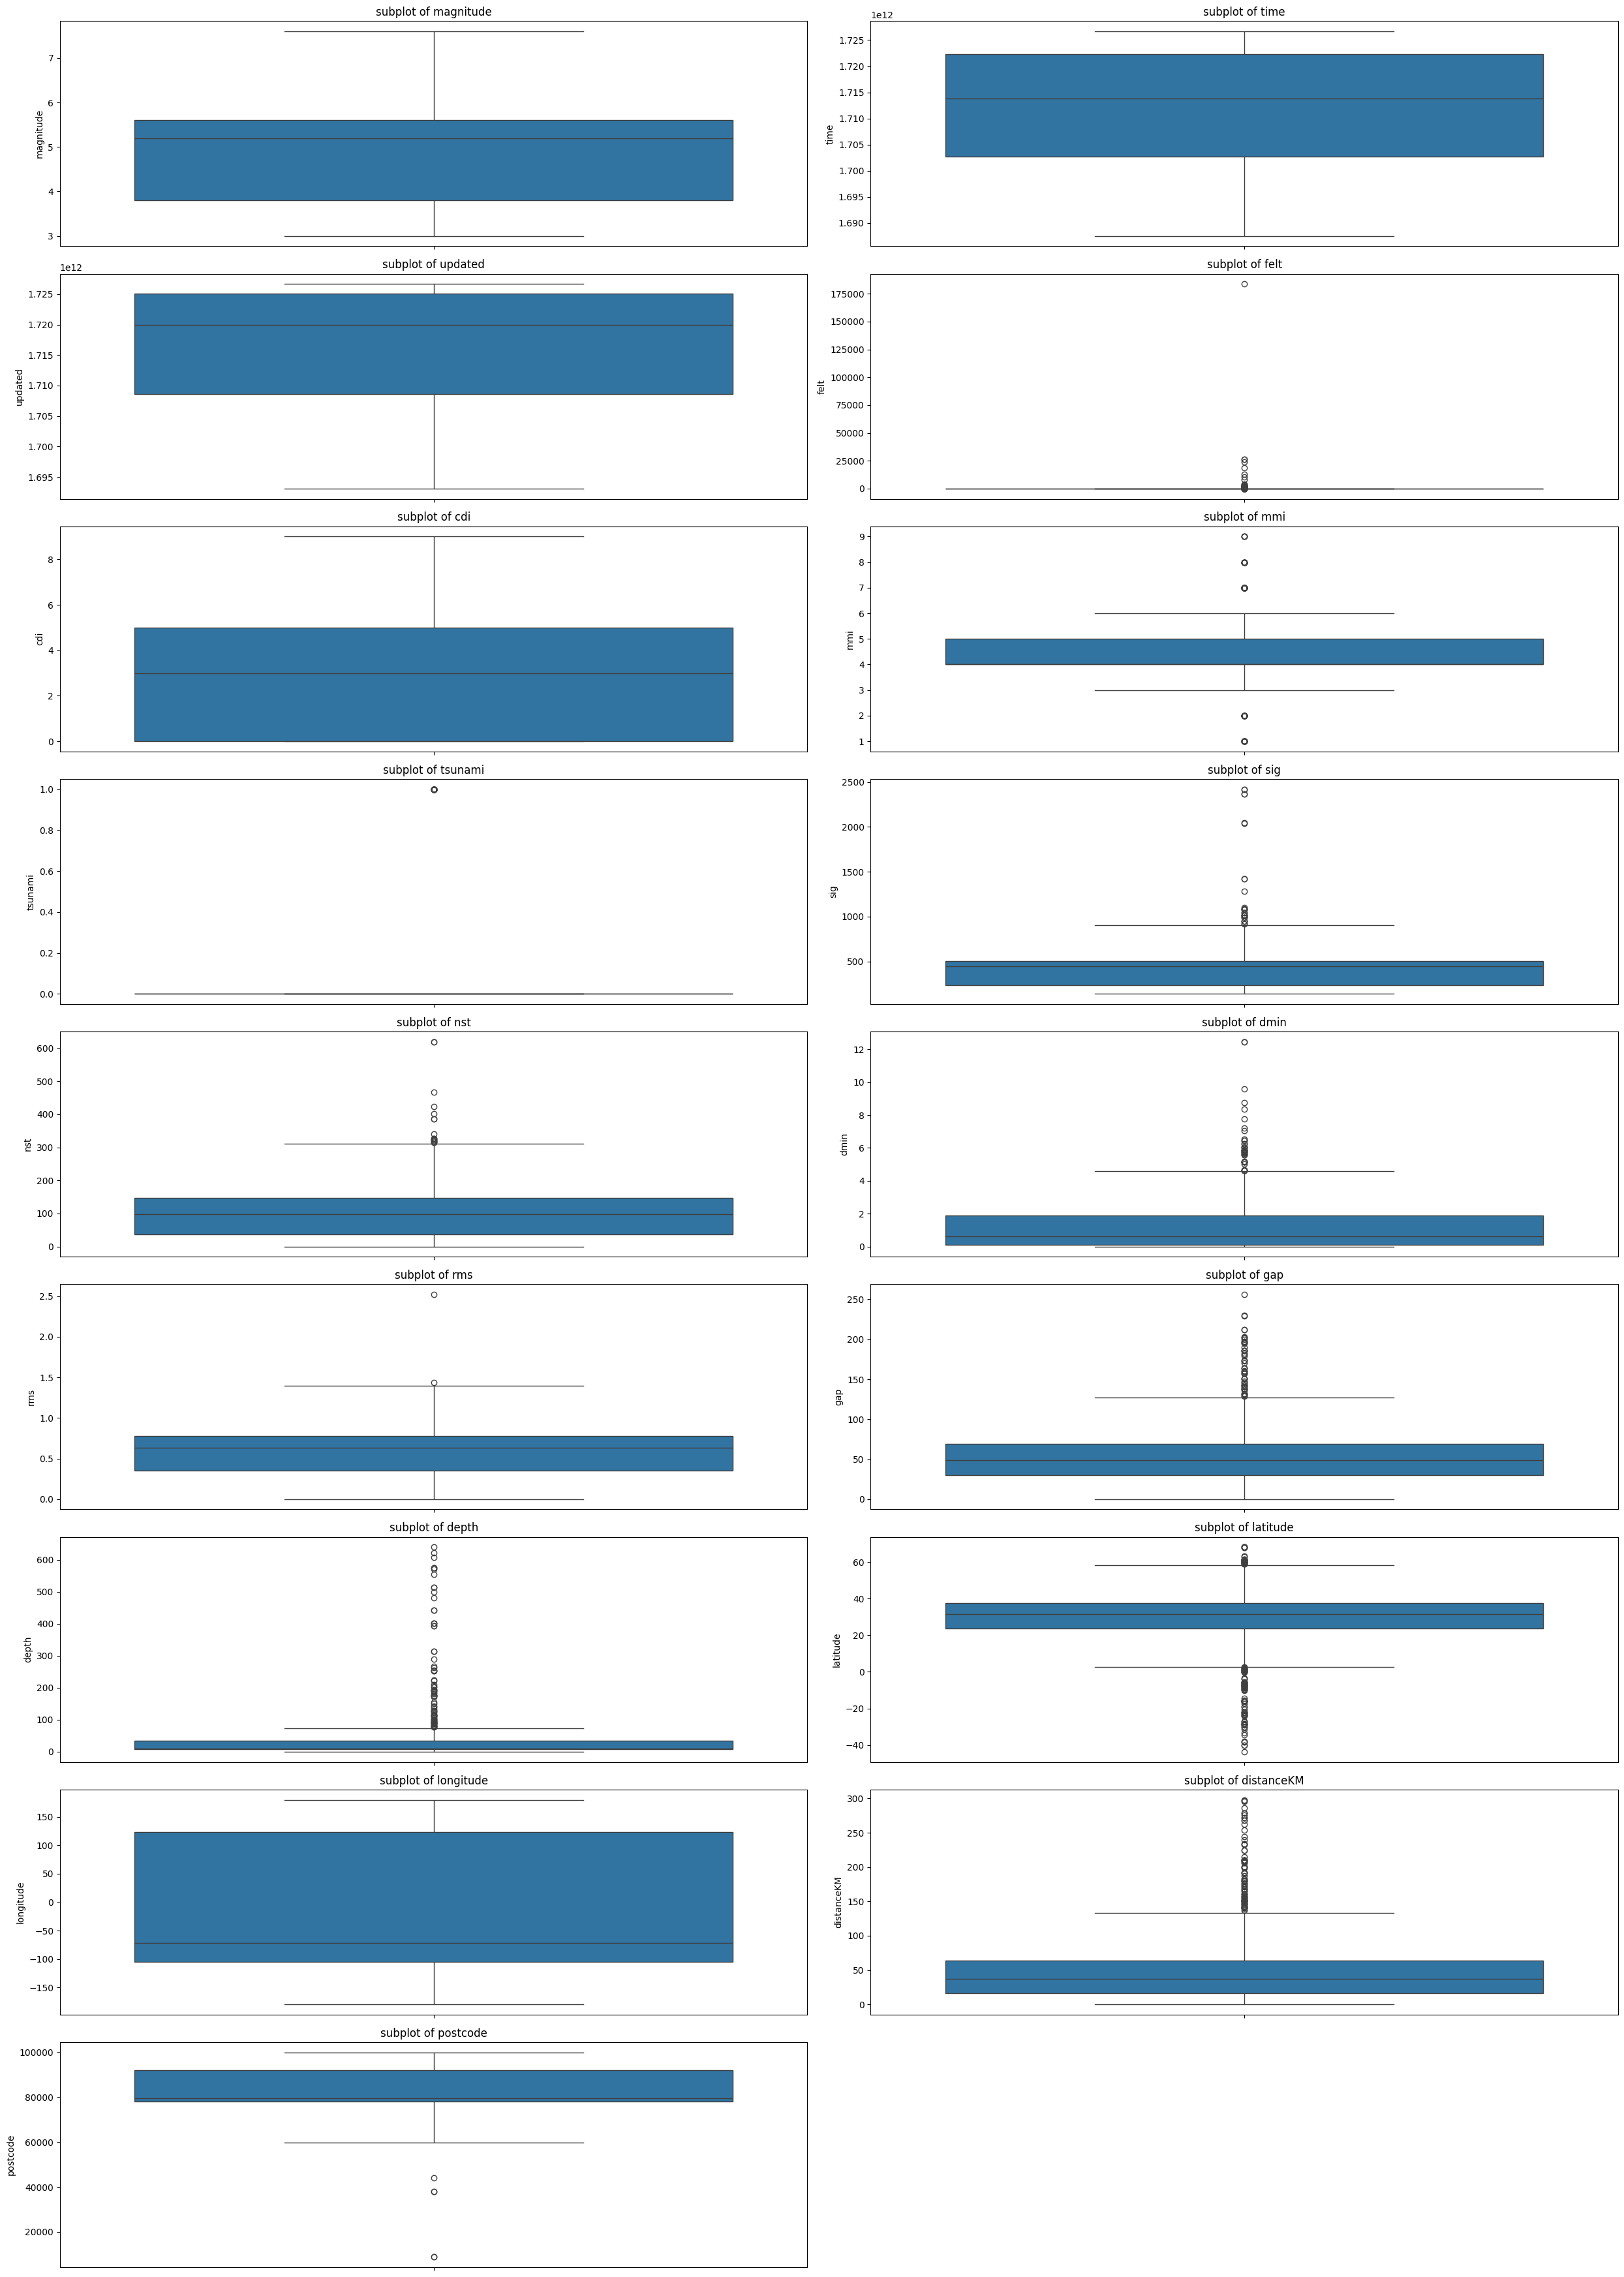

In [23]:
# numerics cols = 18 col
fign, axesn = plt.subplots(nrows=9, ncols=2, figsize=(25, 35))
axesn = axesn.flatten()
df_num = df.select_dtypes(include=['int64','float64'])
for i , col in enumerate(df_num.columns):
    sns.boxplot(data = df,y=col,ax=axesn[i])
    axesn[i].set_title(f'subplot of {col}')

plt.delaxes(axesn[-1])
plt.tight_layout()
plt.show()


<h4 style="font-family: 'Verdana'; color: #3A405A;">Feature Scaling</h4>

In [24]:
# Data Frame after Initial feature selection
df_FS0 = df[useful_col]

In [25]:
df_FS0_num = df_FS0.select_dtypes(include=['int64','float64'])
# initialize scaler 
scaler = MinMaxScaler()
df_FS0_num_scaled =scaler.fit_transform(df_FS0_num)
df_FS0[df_FS0_num.columns] = df_FS0_num_scaled

In [26]:
df_FS0

magnitude      felt       cdi    mmi   alert  tsunami       sig  \
0      0.391304  0.010300  0.666667  0.500   green      0.0  0.375274   
1      0.456522  0.011111  0.666667  0.500   green      0.0  0.395441   
2      0.152174  0.008597  0.444444  0.375   green      0.0  0.198597   
3      0.195652  0.000027  0.333333  0.375   green      0.0  0.042964   
4      0.239130  0.000022  0.333333  0.375   green      0.0  0.053485   
...         ...       ...       ...    ...     ...      ...       ...   
1124   0.478261  0.000473  0.444444  0.500   green      0.0  0.138097   
1125   0.500000  0.000027  0.444444  0.750  yellow      0.0  0.225340   
1126   0.434783  0.000011  0.555556  0.625   green      0.0  0.108724   
1127   0.543478  0.000038  0.444444  0.750   green      0.0  0.144673   
1135   0.586957  0.000713  0.888889  0.750   green      0.0  0.204735   

           rms       gap                 location magType     depth  latitude  \
0     0.190476  0.273438           Ackerly, Texas     mww  0.006712  0.680221   
1     0.039683  0.148438           Ackerly, Texas      ml  0.009969  0.680360   
2     0.111111  0.386719               Malibu, CA      ml  0.017429  0.695142   
3     0.039683  0.253906  Whites City, New Mexico      ml  0.010086  0.673505   
4     0.103175  0.261719  Whites City, New Mexico      mb  0.014168  0.673373   
...        ...       ...                      ...     ...       ...       ...   
1124  0.325397  0.113281         Bharatpur, Nepal      mb  0.040572  0.639727   
1125  0.273810  0.175781       Bandar Abbas, Iran     mww  0.016022  0.638619   
1126  0.293651  0.175781       Bandar Abbas, Iran     mww  0.016022  0.638127   
1127  0.269841  0.148438       Bandar Abbas, Iran     mww  0.016022  0.638551   
1135  0.130952  0.089844           Dipayal, Nepal     mww  0.020711  0.654461   

      longitude  
0      0.216141  
1      0.216105  
2      0.169549  
3      0.209454  
4      0.209390  
...         ...  
1124   0.735246  
1125   0.655637  
1126   0.655673  
1127   0.655802  
1135   0.725498  

[800 rows x 14 columns]

<h4 style="font-family: 'Verdana'; color: #3A405A;">Encoding Categorical Data</h4>

In [27]:
df_FS0_cat = df_FS0.select_dtypes(include=['object'])
df_FS0_cat.nunique()

alert         4
location    270
magType       9
dtype: int64

In [28]:
# using One hot encoder to encode alert col
# initlaize encoder 
# encoder = OneHotEncoder(drop=None)
# alert_encoded  = encoder.fit_transform(df_FS0_cat[['alert']])
# # create a DF 
# alert_encoded_df = pd.DataFrame(alert_encoded,columns=encoder.get_feature_names_out(['alert']))

# one line solution 
# ONE HOT ENCODING 
alert_encoded = pd.get_dummies(df_FS0_cat,columns=['alert'],dtype='int')
print(alert_encoded)

# LABEL ENCODING
# initilize Label Encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder() 
df_FS0['LE_alert'] = LE.fit_transform(df_FS0['alert'])
print(df_FS0['LE_alert'])


                     location magType  alert_green  alert_orange  alert_red  \
0              Ackerly, Texas     mww            1             0          0   
1              Ackerly, Texas      ml            1             0          0   
2                  Malibu, CA      ml            1             0          0   
3     Whites City, New Mexico      ml            1             0          0   
4     Whites City, New Mexico      mb            1             0          0   
...                       ...     ...          ...           ...        ...   
1124         Bharatpur, Nepal      mb            1             0          0   
1125       Bandar Abbas, Iran     mww            0             0          0   
1126       Bandar Abbas, Iran     mww            1             0          0   
1127       Bandar Abbas, Iran     mww            1             0          0   
1135           Dipayal, Nepal     mww            1             0          0   

      alert_yellow  
0                0  
1        

In [29]:
# Drop categorical colums after encoding them
df_FS0 = df_FS0.drop(columns='alert')

In [30]:
# concatenate dataFrame with elected features(numeric) with encoded categorical data 
df_FS0_New = pd.concat([df_FS0,alert_encoded],axis=1)
df_FS0_New 

magnitude      felt       cdi    mmi  tsunami       sig       rms  \
0      0.391304  0.010300  0.666667  0.500      0.0  0.375274  0.190476   
1      0.456522  0.011111  0.666667  0.500      0.0  0.395441  0.039683   
2      0.152174  0.008597  0.444444  0.375      0.0  0.198597  0.111111   
3      0.195652  0.000027  0.333333  0.375      0.0  0.042964  0.039683   
4      0.239130  0.000022  0.333333  0.375      0.0  0.053485  0.103175   
...         ...       ...       ...    ...      ...       ...       ...   
1124   0.478261  0.000473  0.444444  0.500      0.0  0.138097  0.325397   
1125   0.500000  0.000027  0.444444  0.750      0.0  0.225340  0.273810   
1126   0.434783  0.000011  0.555556  0.625      0.0  0.108724  0.293651   
1127   0.543478  0.000038  0.444444  0.750      0.0  0.144673  0.269841   
1135   0.586957  0.000713  0.888889  0.750      0.0  0.204735  0.130952   

           gap                 location magType     depth  latitude  \
0     0.273438           Ackerly, Texas     mww  0.006712  0.680221   
1     0.148438           Ackerly, Texas      ml  0.009969  0.680360   
2     0.386719               Malibu, CA      ml  0.017429  0.695142   
3     0.253906  Whites City, New Mexico      ml  0.010086  0.673505   
4     0.261719  Whites City, New Mexico      mb  0.014168  0.673373   
...        ...                      ...     ...       ...       ...   
1124  0.113281         Bharatpur, Nepal      mb  0.040572  0.639727   
1125  0.175781       Bandar Abbas, Iran     mww  0.016022  0.638619   
1126  0.175781       Bandar Abbas, Iran     mww  0.016022  0.638127   
1127  0.148438       Bandar Abbas, Iran     mww  0.016022  0.638551   
1135  0.089844           Dipayal, Nepal     mww  0.020711  0.654461   

      longitude  LE_alert                 location magType  alert_green  \
0      0.216141         0           Ackerly, Texas     mww            1   
1      0.216105         0           Ackerly, Texas      ml            1   
2      0.169549         0               Malibu, CA      ml            1   
3      0.209454         0  Whites City, New Mexico      ml            1   
4      0.209390         0  Whites City, New Mexico      mb            1   
...         ...       ...                      ...     ...          ...   
1124   0.735246         0         Bharatpur, Nepal      mb            1   
1125   0.655637         3       Bandar Abbas, Iran     mww            0   
1126   0.655673         0       Bandar Abbas, Iran     mww            1   
1127   0.655802         0       Bandar Abbas, Iran     mww            1   
1135   0.725498         0           Dipayal, Nepal     mww            1   

      alert_orange  alert_red  alert_yellow  
0                0          0             0  
1                0          0             0  
2                0          0             0  
3                0          0             0  
4                0          0             0  
...            ...        ...           ...  
1124             0          0             0  
1125             0          0             1  
1126             0          0             0  
1127             0          0             0  
1135             0          0             0  

[800 rows x 20 columns]


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Exploratory Data Analysis (EDA)</h3>


<div style="padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(64, 224, 208, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #6495ED; line-height: 1.5em;">
    Heatmap for Target cols : 
    <li><a href="#handling-missing-data">1- Magnitude </a></li>
</div>


In [31]:
# show correlation between the three target cols and other affecting features.
# Calculate the correlation matrix
corr_matrx = df_FS0_New.corr(numeric_only=True) 


<div style="background-color: #FFF3E0; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733; Font-Size: 16px">⚠️ Note:</h3>
    <p style="font-size: 14px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    remember to but target in [ ] , square  brackets !
    </p>
</div>

In [32]:
# Get the correlations between the target column and all other features
#function to get corr with single col
def corr_with_target(df,target): # insert data frame, target col
    corr_matrx = df.corr(numeric_only=True)
    target_corr= corr_matrx[target].sort_values(by=target,ascending=False)
    plt.figure(figsize=(10,10))
    sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation of {target} with other features')
    plt.show()
    return target_corr


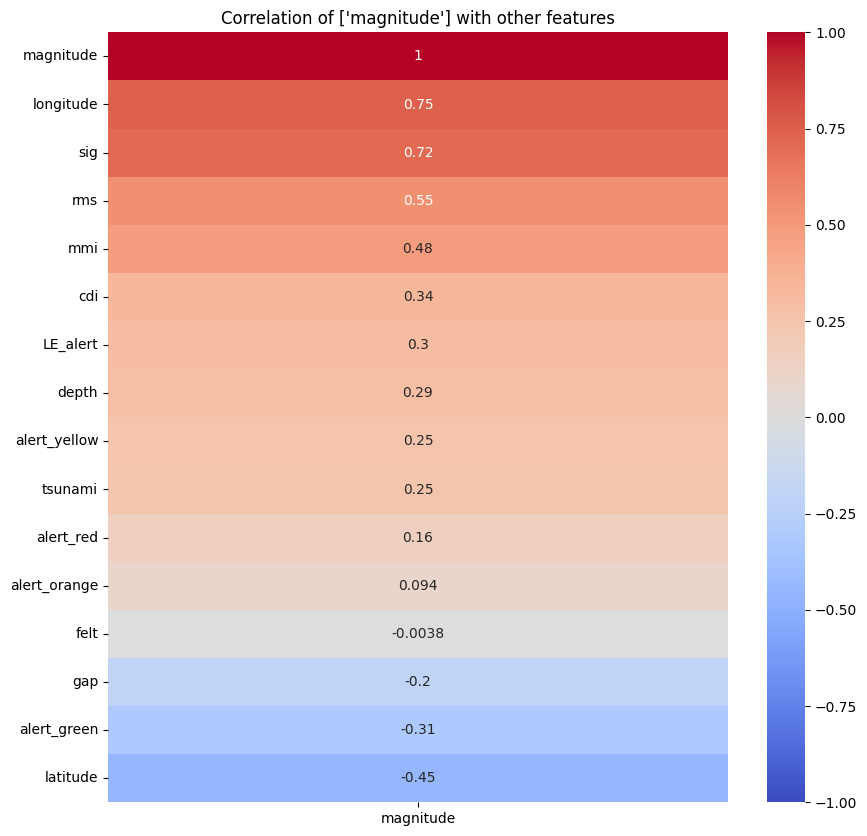

In [33]:
# 1-  magnitude col
mag_target_corr = corr_with_target(df=df_FS0_New,target=['magnitude'])

In [34]:
# feature selection depending on heatmap result 
mag_features = mag_target_corr.apply(lambda x: x[((x > 0.45) | (x < -0.45)) & (x != 1)]).index.to_list()


<li><a href="#handling-missing-data">2- tsunami </a></li>



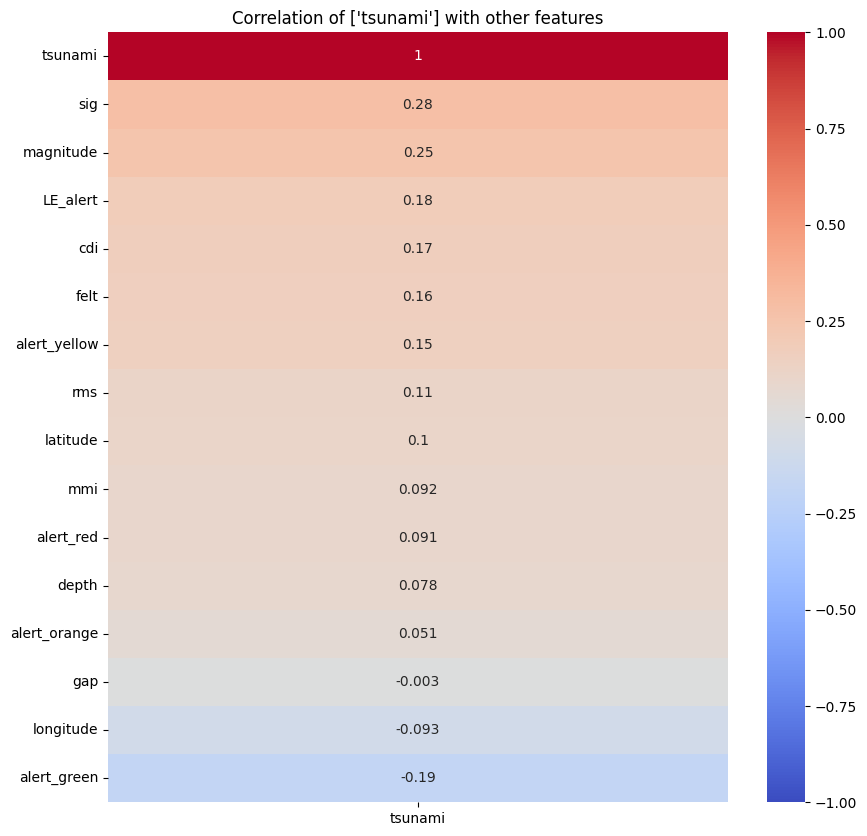

['sig',
 'magnitude',
 'LE_alert',
 'cdi',
 'felt',
 'alert_yellow',
 'rms',
 'latitude',
 'alert_green']

In [35]:
# 1-  magnitude col
tsu_target_corr = corr_with_target(df=df_FS0_New,target=['tsunami'])
# feature selection depending on heatmap result 
tsu_features = tsu_target_corr.apply(lambda x: x[((x > 0.1) | (x < -0.1)) & (x != 1)]).index.to_list()
tsu_features

<li><a href="#handling-missing-data">2- alert cols </a></li>



In [36]:
df_FS0_New.columns

Index(['magnitude', 'felt', 'cdi', 'mmi', 'tsunami', 'sig', 'rms', 'gap',
       'location', 'magType', 'depth', 'latitude', 'longitude', 'LE_alert',
       'location', 'magType', 'alert_green', 'alert_orange', 'alert_red',
       'alert_yellow'],
      dtype='object')

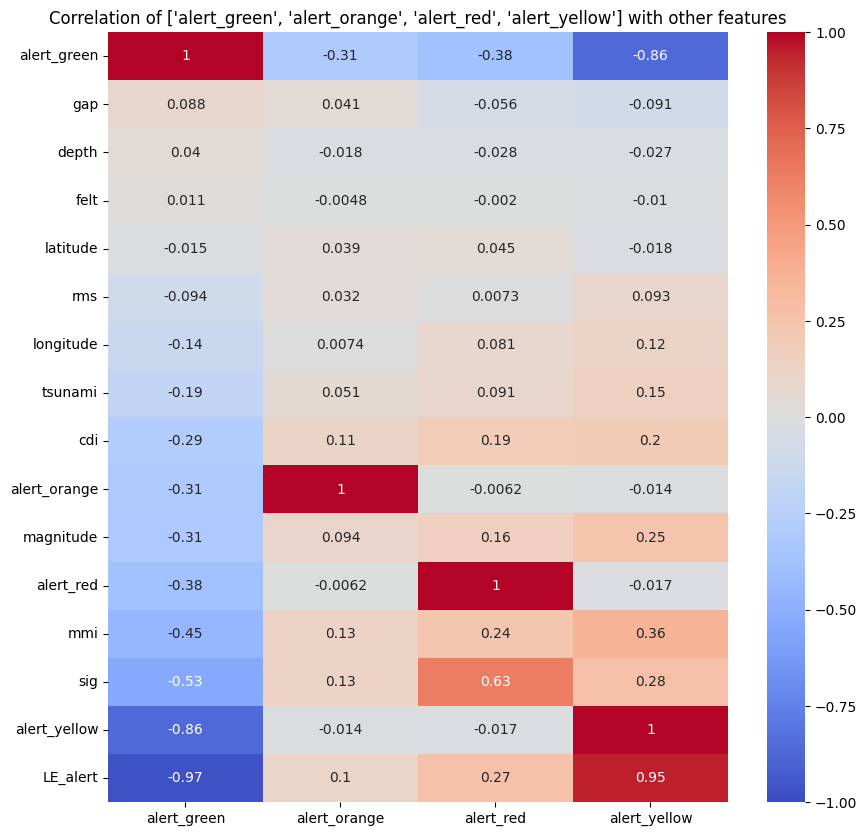

['LE_alert',
 'alert_green',
 'alert_orange',
 'alert_red',
 'alert_yellow',
 'cdi',
 'longitude',
 'magnitude',
 'mmi',
 'sig',
 'tsunami']

In [37]:
# 1-  alert col
alert_feature = ['alert_green','alert_orange', 'alert_red', 'alert_yellow']
alr_target_corr = corr_with_target(df=df_FS0_New,target= alert_feature)
# feature selection depending on heatmap result 
alr_features = alr_target_corr.apply(lambda x: x[((x > 0.1) | (x < -0.1)) & (x != 1)]).index.to_list()
alr_features

<div style="padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(64, 224, 208, 0.1);">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #6495ED; line-height: 1.5em;">
    Feature selection using (RFE): <br>
</div>

In [38]:
# data frame numeric only 
data_numeric = df_FS0_New.select_dtypes(include=['float64','int']) # df_FS0_New_numeric
# magnitude 
magnitude_X = data_numeric.drop(columns=['magnitude'])
magnitude_y = data_numeric['magnitude']

# alert
alert_X = data_numeric.drop(columns=['alert_green','alert_orange', 'alert_red', 'alert_yellow'])
alert_y = data_numeric[['alert_green','alert_orange', 'alert_red', 'alert_yellow']].astype(str).agg(
        ''.join,axis=1).astype(int)

# tsunami
tsunami_X = data_numeric.drop(columns=['tsunami'])
tsunami_y = data_numeric['tsunami']


In [39]:
#    'Recursive Feature Elimination'
# Use Logistic Regression as the estimator 
model_mag = LinearRegression()
rfe_mag = RFE(estimator=model_mag,n_features_to_select=5)

#  Fit the RFE model
fit_mag = rfe_mag.fit(magnitude_X,magnitude_y) # fit for magnitude 

In [40]:
model_alr = LinearRegression()
rfe_alr = RFE(estimator=model_alr,n_features_to_select=5)

#  Fit the RFE model
fit_alr = rfe_alr.fit(alert_X,alert_y) # fit for alert


In [41]:
model_tsu = LinearRegression()
rfe_tsu = RFE(estimator=model_tsu,n_features_to_select=5)

#  Fit the RFE model
fit_tsu = rfe_tsu.fit(tsunami_X,tsunami_y) # fit for tsunami


In [42]:
len(fit_alr.support_), (alert_X.shape[1])
alert_X.columns , fit_alr.support_

(Index(['magnitude', 'felt', 'cdi', 'mmi', 'tsunami', 'sig', 'rms', 'gap',
        'depth', 'latitude', 'longitude', 'LE_alert'],
       dtype='object'),
 array([ True,  True, False, False, False,  True, False,  True, False,
        False, False,  True]))

In [43]:
print("Selected Features for magnitude using RFE:", magnitude_X.columns[fit_mag.support_])

print("Selected Features for alert using RFE:", alert_X.columns[fit_alr.support_])

print("Selected Features for tsunami using RFE:", tsunami_X.columns[fit_tsu.support_])


Selected Features for magnitude using RFE: Index(['felt', 'sig', 'rms', 'longitude', 'alert_red'], dtype='object')
Selected Features for alert using RFE: Index(['magnitude', 'felt', 'sig', 'gap', 'LE_alert'], dtype='object')
Selected Features for tsunami using RFE: Index(['magnitude', 'felt', 'rms', 'latitude', 'longitude'], dtype='object')


Note : i will use a compination of features selected 

In [44]:
## Magnitiude 
# magnitude = ['depth','latitude','longitude','gap','rms','magType']    --> chatGPT
# ['longitude', 'sig', 'rms', 'mmi', 'latitude']                        --> corr
# ['felt', 'sig', 'rms', 'longitude', 'alert_red']                       --> RFE
magnitude_FF = ['depth', 'latitude', 'longitude', 'gap', 'rms', 'felt','sig','alert_red','magnitude']

## alert 
# alert = ['magnitude','tsunami','cdi']                                                --> chatGPT
# ['cdi','longitude','magnitude','mmi','sig','tsunami']                                --> corr
# ['felt', 'mmi', 'sig', 'latitude', 'longitude']                                      --> RFE
alert_FF = ['cdi','longitude','magnitude','mmi','sig','tsunami','felt']

## tsunami 
# tsunami = ['magnitude','depth','location']                                                 --> chatGPT
# ['sig', 'magnitude', 'cdi','felt','alert_yellow','rms', 'latitude', 'alert_green']         --> corr
# ['magnitude', 'felt', 'rms', 'latitude', 'longitude']                                     --> RFE
tsunami_FF = ['sig', 'magnitude', 'cdi','felt','alert_yellow','rms','depth','location','tsunami']



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Feature Engineering</h3>


In [45]:
# DF for magnitude
mag_df = df_FS0_New[magnitude_FF]

In [46]:
# DF for alert
alr_df = df_FS0_New[alert_FF]

In [47]:
# DF for tsunami
tsu_df = df_FS0_New[tsunami_FF]

In [48]:
# convert time into datetime
df['date'] = pd.to_datetime(df['time'])

# Extract additional features  from datetime col
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">EDA [using df]</h3>



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #C71585	;">1 - Univariate Analysis  </h3>


In [49]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('<M8[ns]'), dtype('int64'),
       dtype('int32')], dtype=object)

In [50]:
# separate Data into numerical and categorical
col_num = df.select_dtypes(include=['int32','int64','float64','<M8[ns]'])
col_cat = df.select_dtypes(include=['object'])
print('numerical cols number = ',len(col_num.columns))
print('categorical cols number = ',len(col_cat.columns))


numerical cols number =  25
categorical cols number =  24


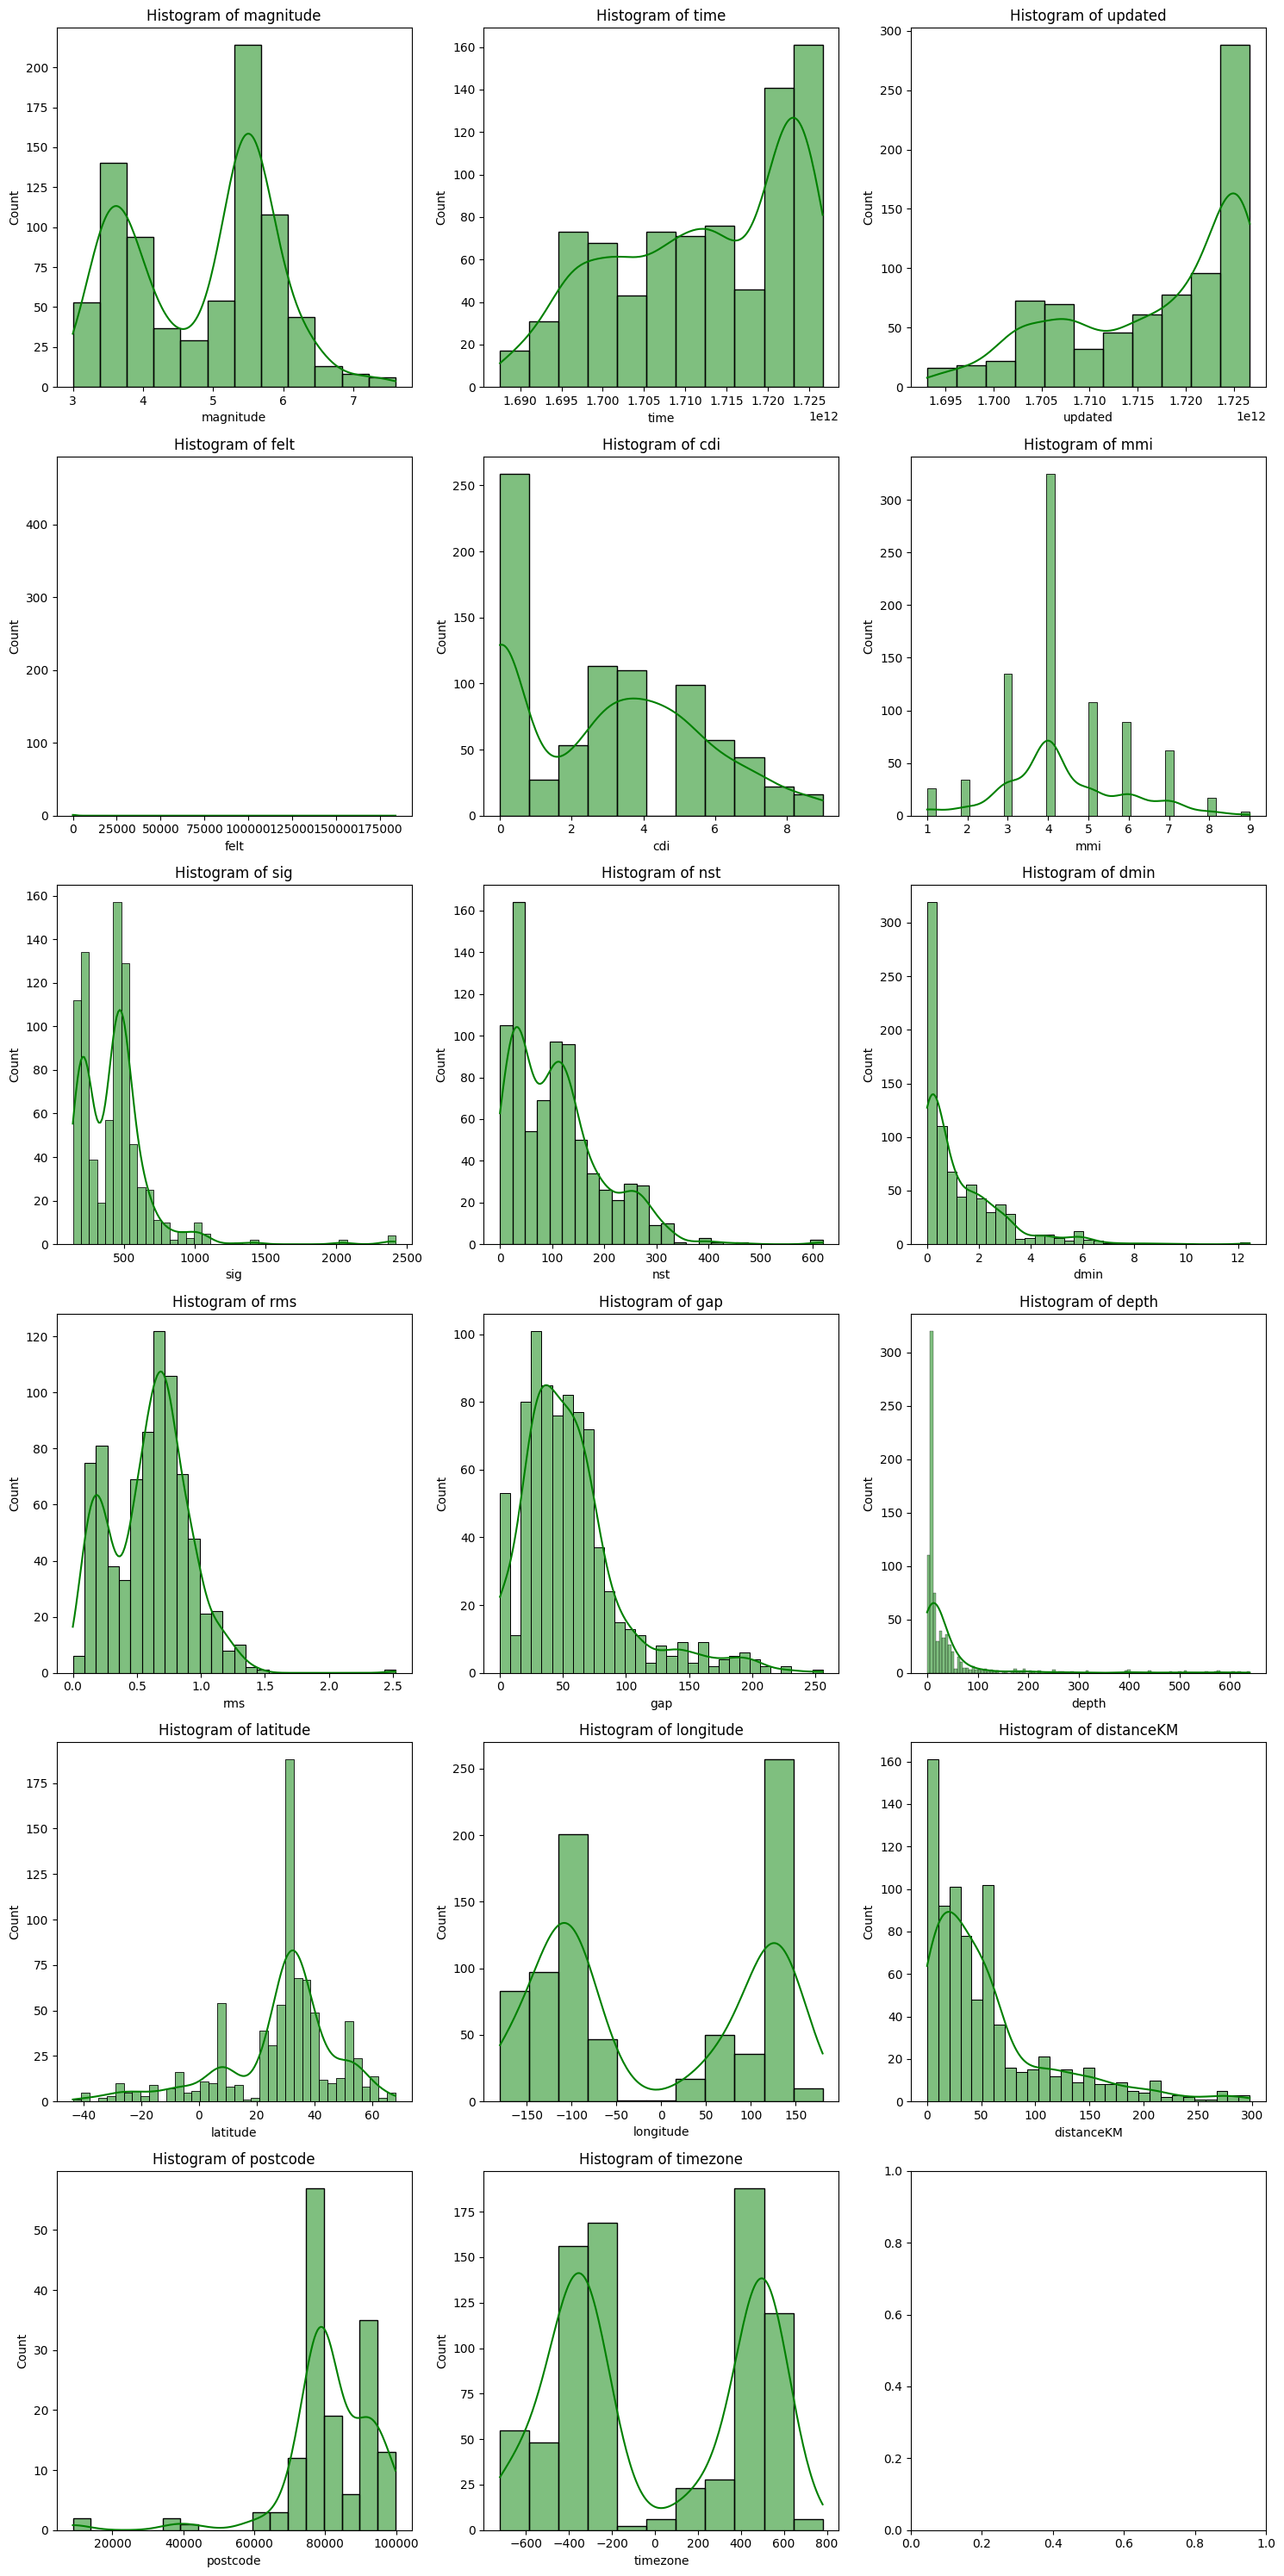

In [51]:
# continous numerical features , Distribution plot
col_num = ['magnitude', 'time', 'updated', 'felt', 'cdi', 'mmi',
       'sig', 'nst', 'dmin', 'rms', 'gap', 'depth', 'latitude', 'longitude',
       'distanceKM', 'postcode', 'timezone']

fig ,axes = plt.subplots(6,3,figsize=(15,30))   
axes = axes.flatten()

for i,col in enumerate(col_num):
    sns.histplot(data = df, x = col ,ax= axes[i],color ='green',kde=True)
    axes[i].set_title(f'Histogram of {col}')

#  delete last plot of subplots 
plt.tight_layout()
plt.show()


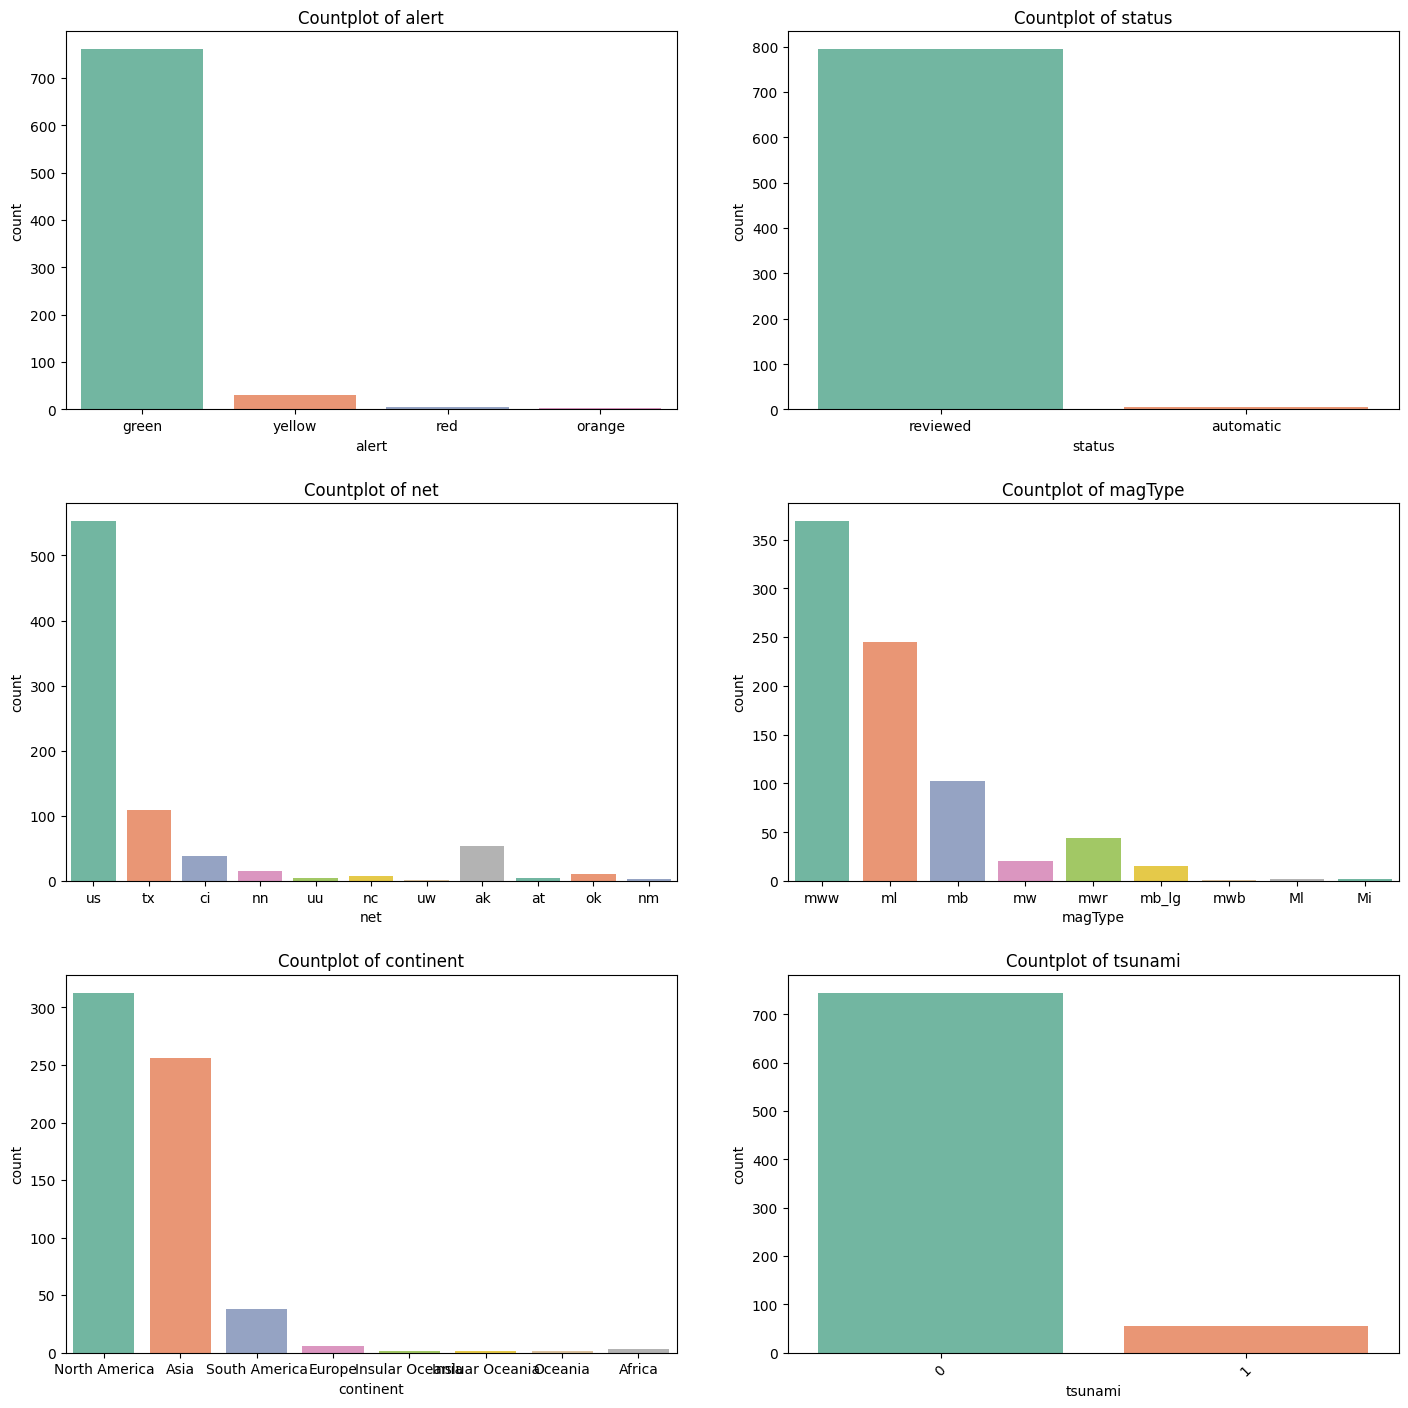

In [52]:
# categorical features & descrete numerical features 
col_desc_cat = [ 'alert', 'status', 'net','magType',
       'continent', 'tsunami']

fig ,axes = plt.subplots(3,2,figsize=(15,15))   
axes = axes.flatten()

for i,col in enumerate(col_desc_cat):
    sns.countplot(data = df, x = col, ax= axes[i],palette='Set2')
    axes[i].set_title(f'Countplot of {col}')
    
plt.xticks(rotation= 45)
plt.tight_layout(pad=4.0, h_pad=2.0)
plt.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">- depth groups  </h3>


In [53]:
# Binning of most frequant depth Ranges
df.depth.describe().to_frame()

depth
count  800.000000
mean    38.377687
std     83.013337
min     -0.250000
25%      7.463075
50%     10.000000
75%     35.000000
max    639.503000

In [54]:
# Define the bin edges for the groups
bins = [-3,0,10,40,600]
# Define the bin labels for the groups
labels = ['<0' , '0-10' , '11-40', '>600']
# cut the depth col into groups 
df['depthGroups'] = pd.cut(df['depth'], bins=bins , labels=labels)

In [55]:
fig = px.histogram(data_frame=df, y='depthGroups',
                   title= ' Most frequent EQ depth Range',
                   color = 'tsunami', # color the bars by the count,
                   ) 
fig.show()


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #C71585	;">2 - Bivariate Analysis  </h3>



<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">- felt X magnitude  </h3>


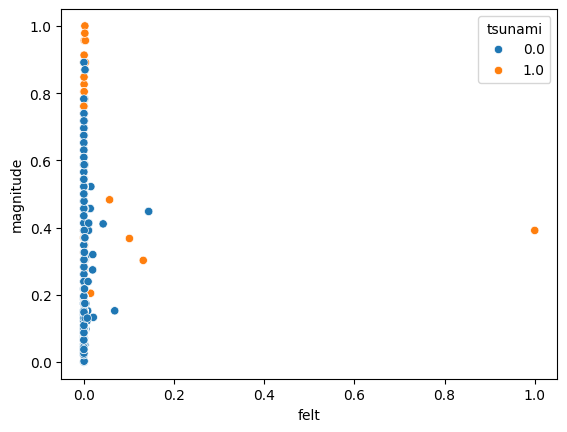

In [56]:
# plt.figure(figsize=(10,6))
# sns.displot
sns.scatterplot(df_FS0_New,x='felt',y='magnitude',hue='tsunami')
plt.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">- felt X country  </h3>


In [57]:
# Example: Assuming you have 'latitude', 'longitude', 'country', and 'felt' columns
fig = px.scatter_geo(df, lat='latitude', lon= 'longitude', color = 'felt',
                     hover_name= 'country',size='felt',
                     projection='natural earth',
                     title= ' felt values by country')
fig.update_traces(marker =dict(size= 8))
fig.show()

In [58]:
####  another method to map 


# fog = px.choropleth(df, locations = 'country', locationmode= 'country names',
#                     color='felt',
#                     color_continuous_scale="Viridis",
#                     title= 'EQ felt degree by country',
#                     )
# fig.update_traces(marker=dict(size=8)) # increase dots [marker] size 

# # Update layout to set the figure size
# fig.update_layout(
#     width=1200,  # Set the width of the figure
#     height=800,  # Set the height of the figure
# )
# fig.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">depth X magnitude  </h3>


In [59]:
fig = px.scatter(df ,x='depth',y='magnitude' , color='tsunami',
                 title= ' depth VS magnitude')
fig.show()

<div style="font-size:16px ; background-color: #FAFAD2; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733;">💬 comment:</h3>
    <p style="font-size: 16px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    - the shallower the earthquake and larger the magnitude, the more potential for destruction.
    </p>
</div>


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">EQ countries VS depth VS tsunami  </h3>


In [60]:
# Plot the number of earthquakes by country
fig = px.histogram(data_frame=df, x='country', y ='depth',
                   title= ' Distribution of earthquake Depths',
                   color = 'tsunami', # color the bars by the count,
                   ) 
fig.show()

<div style="font-size:16px ; background-color: #FAFAD2; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733;">💬 comment:</h3>
    <p style="font-size: 16px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    - Highest depth are in Indoensia, USA & Argentina countries.
    </p>
</div>


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">EQ count by country </h3>


In [61]:
country_EQcount  = df.country.value_counts(ascending=True).reset_index()
country_EQcount.columns = ['country', 'count'] # Rename columns


In [62]:
# Plot the number of earthquakes by country
fig = px.histogram(data_frame=country_EQcount, x='count', y ='country',
                   title= ' Number of earthQuakes by Country',
                   color = 'count', # color the bars by the count,
                   ) 
fig.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">EQ count by continent  </h3>
  </h3>


In [63]:
continent_EQcount  = df.continent.value_counts(ascending=True).reset_index()
continent_EQcount.columns = ['continent', 'count'] # Rename columns


In [64]:
# Plot the number of earthquakes by continent
fig = px.histogram(data_frame=continent_EQcount, x='count', y ='continent',
                   title= ' Number of earthQuakes by Continent',
                   color = 'count', # color the bars by the count,
                   ) 
fig.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">- alert levels VS data gap </h3>


In [65]:
#color map 
color_map = {'green': '#98FB98', 'yellow': '#fdff80', 'red': '#f62323', 'orange': '#FFA500'}

fig = px.box(data_frame=df, x ='alert' ,y='gap',
             title = 'Data Gaps by alert levels', color='alert',
             color_discrete_map=color_map)
fig.update_layout(xaxis_title = 'Alert Level', yaxis_title='Gap')
fig.show()

<div style="font-size:16px ; background-color: #FAFAD2; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733;">💬 comment:</h3>
    <p style="font-size: 16px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    - Data gap between stations detecting the earthquake increase at green and orange  levels. This is due to the fact that the stations are not synchronized and the data is not transmitted.
    </p>
</div>


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #C71585	;">3 - Multivariate Analysis  </h3>



<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">longitude X latitude X magnitude </h3>


In [66]:
# Plot the number of earthquakes by continent
fig = px.scatter(data_frame=df, x='longitude', y ='latitude',
                   title= ' Longitude VS Latitude VS magnitude of EQs',
                   color= 'magnitude' # color the bars by the count,
                   ) 
fig.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">alert X magnitude  </h3>


In [67]:
#color map 
color_map = {'green': '#98FB98', 'yellow': '#fdff80', 'red': '#f62323', 'orange': '#FFA500'}

fig = px.box(data_frame=df, x ='alert' ,y='magnitude',
             title = 'Magnitude Distribution Across Alert Levels', color='alert',
             color_discrete_map=color_map)
fig.update_layout(xaxis_title = 'Alert Level', yaxis_title='Magnitude')
fig.show()

<div style="font-size:16px ; background-color: #FAFAD2; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733;">💬 comment:</h3>
    <p style="font-size: 16px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    - As the earthquake magnitude increases, the alert level rises in severity: red > orange > yellow > green. This makes sense, as higher magnitudes represent more dangerous earthquakes, requiring stronger alerts for better preparedness and response.
    </p>
</div>

![my plot](C:/Users/Laptop_Academy/Downloads/alerts.jpg)



<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">alert X location X magnitude  </h3>


In [68]:
def plot_enhanced_geo_map(df):
    # Initialize the map centered around the mean coordinates
    m = folium.Map(location=[df['latitude'].mean(),df['longitude'].mean()],zoom_start=2)

    # Create a marker cluster
    marker_cluster = MarkerCluster().add_to(m)

    # Add points to the map with color coding and informative popups
    for _,row in df.iterrows():
        magnitude = row['magnitude']
        if magnitude < 0.3:
            color = 'blue'
        elif 3.0 <= magnitude < 5.0:
            color = 'green'
        elif  5.0 <= magnitude < 7.0:
            color= 'orange'
        else : 
            color = 'red'
        tsu = ['yes' if (row['tsunami'] ==1) else 'No']
        folium.CircleMarker(
            location=[row['latitude'],row['longitude']],
            radius=5,
            popup=(
                f"location: {row['location']}<br>"
                f"Time: {row['date']}<br>"
                f"Magnitude: {row['magnitude']}<br>"
                f"Depth: {row['depth']} km <br>"
                f"tsunami:{tsu}"
            ),
            color= color,
            fill = True,
            fill_color = color,
            fill_opacity = 0.7
        ).add_to(marker_cluster)
    return m 

# Display the enhanced map 
enhanced_EQ_map = plot_enhanced_geo_map(df)
enhanced_EQ_map.save('enhanced_earthquake_map.html')  # save it as an html file    
enhanced_EQ_map



<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">sig X (magnitude , langitude , latitude , depth) </h3>


In [69]:
# numerics cols = 18 col
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['sig vs Longitude', 'sig vs Magnitude', 'sig vs Latitude', 'sig vs Depth'])


axesn = axesn.flatten()
columns = ['longitude', 'magnitude', 'latitude', 'depth']
titles = ['Longitude', 'Magnitude', 'Latitude', 'Depth']

for i , col in enumerate(columns):
    row = (i//2) +1
    col_num = (i%2) +1
    scatter = px.scatter(data_frame=df, x= col, y='sig')
    for trace in scatter['data']:
        fig.add_trace(trace,row=row, col=col_num)
# Update the layout and title
fig.update_layout(height=800, width=1000, title_text="sig vs Various Features", showlegend=False)
fig.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">rms X depth X tsunami </h3>


In [70]:
fig = px.scatter(data_frame=df, x ='depth',y='rms', color='tsunami',
                   title='rms [EQ intesity] VS depth Vs tsunami')
fig.show()


<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">- alert VS (mmi, sig, felt, cdi)
 </h3>


In [71]:
# numerics cols = 18 col
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['alert vs mmi', 'alert vs sig', 'alert vs felt', 'alert vs cdi'])

# alert VS 

axesn = axesn.flatten()
columns = ['mmi', 'sig', 'felt', 'cdi']
titles = ['mmi', 'sig', 'felt', 'cdi']

for i , col in enumerate(columns):
    row = (i//2) +1
    col_num = (i%2) +1
    scatter = px.scatter(data_frame=df, x= col, y='alert')
    for trace in scatter['data']:
        fig.add_trace(trace,row=row, col=col_num)
# Update the layout and title
fig.update_layout(height=800, width=1000, title_text="alert vs Various Features", showlegend=False)
fig.show()


<div style="font-size:16px ; background-color: #FAFAD2; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733;">💬 comment:</h3>
    <p style="font-size: 16px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    - As we can see the felt data [nym of people who felt the EQ] has outliers and data is not balanced, so
     we are not gonna use in modelling.
    - 
    </p>
</div>



<h3 style="text-align: left;font-size:20px; color: #FFC0CB	;">- tsunami VS (rms, sig, felt, cdi)
 </h3>


In [72]:
# numerics cols = 18 col
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['tsunami vs rms', 'tsunami vs sig', 'tsunami vs felt', 'tsunami vs cdi'])

# alert VS 

axesn = axesn.flatten()
columns = ['rms', 'sig', 'felt', 'cdi']
titles = ['rms', 'sig', 'felt', 'cdi']

for i , col in enumerate(columns):
    row = (i//2) +1
    col_num = (i%2) +1
    scatter = px.scatter(data_frame=df, x= col, y='tsunami')
    for trace in scatter['data']:
        fig.add_trace(trace,row=row, col=col_num)
# Update the layout and title
fig.update_layout(height=800, width=1000, title_text="tsunami vs Various Features", showlegend=False)
fig.show()


<!-- EQ VS month  -->


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #FF7F50;">1 - Magnitude Model training  </h3>



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Data Modeling</h3>


In [73]:
# features for magnitude 
magnitude_features_final_selection = ['depth','latitude','longitude','gap','rms','felt','sig','alert_red']
X_mag = df_FS0_New[magnitude_features_final_selection]
y_mag = df['magnitude']

In [74]:
# split data 
X_trainM,  X_testM, y_trainM, y_testM = train_test_split(X_mag, y_mag, test_size=0.2)

Models --> [ploylinear regressor, RF regressor , XGB regressor]

In [75]:
# Initialize models 
LR_M = LinearRegression()
RF_M = RandomForestRegressor(random_state=42)
XG_M = XGBRegressor(random_dtate=42)

In [76]:
# Train models
LR_M.fit(X_trainM, y_trainM)
RF_M.fit(X_trainM, y_trainM)
XG_M.fit(X_trainM, y_trainM)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_dtate=42, ...)

In [77]:
# Predict on the test set
y_prLR_M = LR_M.predict(X_testM)
y_prRF_M = RF_M.predict(X_testM)
y_prXG_M = XG_M.predict(X_testM)


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Model Evaluation</h3>


In [176]:
# Define the evaluation function
def print_metrics(y_test, y_pred, model_name, targettype='regression', labels=None):
    """
    Print evaluation metrics for regression or classification models.
    Parameters:
    - y_test: True values.
    - y_pred: Predicted values.
    - model_name: Name of the model.
    - targettype: Either 'regression' (default) or 'classification'.
    - labels: List of class labels for classification.
    """
    
    if targettype == 'regression':
        # For regression, compute MSE and R2 score
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{model_name} \nMean Squared Error = {mse}\nR² Score = {r2}\n")
        return None
    
    elif targettype == 'classification':
        # For classification, compute and return the confusion matrix
        acc =  accuracy_score(y_test, y_pred)
        if 3 in (y_pred):
            confu_mtrx = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
        else : 
            confu_mtrx = confusion_matrix(y_test, y_pred, labels=[0, 1])

        cm_display = ConfusionMatrixDisplay(confu_mtrx, display_labels=labels)
        print(f"Accuracy Score of {model_name} = {acc}")
        print(confu_mtrx)
        print(f"{model_name} - Confusion Matrix:\n")
        return cm_display


In [177]:

print_metrics(y_test=y_testM, y_pred=y_prLR_M, model_name='Linear Regression Model')
print_metrics(y_test=y_testM, y_pred=y_prRF_M, model_name='Random Forest Model')
print_metrics(y_test=y_testM, y_pred=y_prXG_M, model_name='XGBoost Model')

Linear Regression Model 
Mean Squared Error = 0.12490247265688703
R² Score = 0.880818926064111

Random Forest Model 
Mean Squared Error = 0.02884160218749997
R² Score = 0.9724795430417094

XGBoost Model 
Mean Squared Error = 0.039545431108164816
R² Score = 0.9622660236545052



<div style="font-size:16px ; background-color: #FAFAD2; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #FF5733;">💬 comment:</h3>
    <p style="font-size: 16px; font-family: 'Verdana'; color: #FF5733; line-height: 1.5em;">
    - As we can see the felt data [nym of people who felt the EQ] has outliers and data is not balanced, so
     we are not gonna use in modelling.
    - 
    </p>
</div>


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Model plotting</h3>


In [178]:
# Function to create a plot for each model
def Pred_plots(y_test,y_pred,modelname, row, col,figModel):
    # Add scatter plot for predicted vs true values
    figModel.add_trace(
        go.Scatter(x=y_test, y=y_pred, mode='markers', marker=dict(color= 'green'),
                             name=f'{modelname} Predicted VS True'),
        row = row, col=col)
    # Add line plot y=x
    figModel.add_trace(
        go.Scatter(x = [min(y_test),max(y_test)], y = [min(y_test),max(y_test)], mode='lines',
                   line =dict(color='red', width =2), name= 'y=x'),
        row=row , col=col
    )

    # Update layout
    figModel.update_xaxes(title_text='True Values', row=row, col=col)
    figModel.update_yaxes(title_text='Predicted Values', row=row, col=col)

In [179]:
# Plot true vs predicted values for each model
# Function to plot predictions for multiple models
def plot_prediction(y_test,y_pred,modelname):

    # Create subplots for 3 models
    figModel = make_subplots(rows=3, cols=1, subplot_titles= modelname)
    
    # Loop through each model and add corresponding plot
    for i in range(len(modelname)):
        Pred_plots(y_test,y_pred[i],modelname[i],row =i+1,col=1,figModel=figModel)

    # Update layout and show the plot
    figModel.update_layout(
        height=900,  # increase plot height for clarity
        title_text='Model Comparison: True vs Predicted',
        showlegend=False
    )
    figModel.show()

plot_prediction(y_test=y_testM, y_pred=[y_prLR_M, y_prRF_M, y_prXG_M],
                modelname=['Linear regression','Random forest Regressor','XGBoost Regressor'])

In [180]:
# SMOTE --> balancing , random forest   
# from imblearn.over_sampling import SMOTE
# poly Regression
# Random Forest Regressor
# XGBoost Regressor


<div style="background-color:#85c1e9; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #1f618d;">Comments on Model Results:</h3>
    <p><strong>1. Linear Regression Model:</strong></p>
   <ul>
      <li><strong>Mean Squared Error (MSE):</strong> <code>1.77</code> indicates a relatively high error in the predictions. This suggests that the linear model is not capturing the underlying relationships well.</li>
      <li><strong>R² Score:</strong> <code>-0.745</code> indicates the model is performing worse than a simple horizontal line (mean value) would. Negative R² is a strong indication that Linear Regression is not suitable for this dataset.</li>
   </ul>

   <p><strong>2. Random Forest Model:</strong></p>
   <ul>
      <li><strong>Mean Squared Error (MSE):</strong> <code>0.017</code> is very low, indicating that the Random Forest model has made highly accurate predictions.</li>
      <li><strong>R² Score:</strong> <code>0.983</code> is very close to 1, which shows the model explains 98.3% of the variance in the data, signifying a great fit to the dataset.</li>
   </ul>

   <p><strong>3. XGBoost Model:</strong></p>
   <ul>
      <li><strong>Mean Squared Error (MSE):</strong> <code>0.048</code> is also low, but higher than Random Forest. This shows that XGBoost makes good predictions, but not as well as Random Forest.</li>
      <li><strong>R² Score:</strong> <code>0.952</code> is strong, indicating the model explains 95.2% of the variance, but it is slightly less accurate than the Random Forest model.</li>
   </ul>
</div>



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Conclusion</h3>


<div style="background-color:#85c1e9; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <h3 style="font-family: 'Verdana'; color: #1f618d;">Conclusion:</h3>
   <ul>
      <li><strong>Linear Regression:</strong> was not suitable for this data, likely due to non-linear relationships between features and the target.</li>
      </li>
   </ul>
   <ul>
      <li><strong>XGBoost:</strong> performed well but did not surpass <strong>Random Forest</strong>, which indicates that Random Forest’s approach of averaging across multiple decision trees suited this dataset best.</li>
   </ul>

</div>



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #FF7F50;">2 - Alert Model training  </h3>



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Model training</h3>


In [181]:
# features for alert 
alert_features_final_selection = ['cdi', 'longitude', 'magnitude', 'mmi', 'sig', 'tsunami']
ALFFS = ['magnitude', 'felt', 'cdi', 'mmi', 'tsunami', 'sig', 'rms', 'gap','depth', 'latitude', 'longitude']
X_alr= df_FS0_New[alert_features_final_selection]
y_alr= df_FS0_New['LE_alert'] # all the four cols combined into one  col


In [182]:
# split data 
X_trainA,  X_testA, y_trainA, y_testA = train_test_split(X_alr, y_alr, test_size=0.3,random_state=42)

In [183]:
# oversampling Data using [SMOTE]
counter = Counter(y_trainA)
print('Before for alert', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=42,k_neighbors=2)   # NOTE:  deafult number of neighbors  is greater than the number of samples in the minority class we have here.
X_trainA_smt,y_trainA_smt = smt.fit_resample(X_trainA,y_trainA)

counter = Counter(y_trainA_smt)
print('After for alert', counter)


Before for alert Counter({0: 534, 3: 17, 2: 5, 1: 4})
After for alert Counter({0: 534, 3: 534, 1: 534, 2: 534})


Models --> [ regressor, RF regressor , XGB regressor]

In [184]:
# Initialize models 
LR_A = LogisticRegression()
RF_A = RandomForestClassifier(random_state=42)
XG_A = XGBClassifier(random_dtate=42)


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Model Evaluation</h3>


In [185]:
# Train models
LR_A.fit(X_trainA_smt, y_trainA_smt)
RF_A.fit(X_trainA_smt, y_trainA_smt)
XG_A.fit(X_trainA_smt, y_trainA_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [186]:
# Predict on the test set
y_prLR_A = LR_A.predict(X_testA)
y_prRF_A = RF_A.predict(X_testA)
y_prXG_A = XG_A.predict(X_testA)


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Model Evaluation</h3>


Accuracy Score of Logistic Regression Model = 0.925
[[213   8   0   5]
 [  0   0   0   0]
 [  0   0   1   0]
 [  2   3   0   8]]
Logistic Regression Model - Confusion Matrix:

Accuracy Score of Random Forest Model = 0.9833333333333333
[[225   1   0   0]
 [  0   0   0   0]
 [  0   0   1   0]
 [  3   0   0  10]]
Random Forest Model - Confusion Matrix:

Accuracy Score of XGBoost Model = 0.9916666666666667
[[225   1   0   0]
 [  0   0   0   0]
 [  0   0   1   0]
 [  1   0   0  12]]
XGBoost Model - Confusion Matrix:



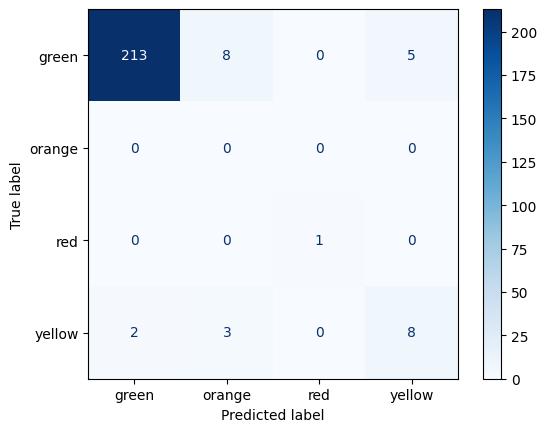

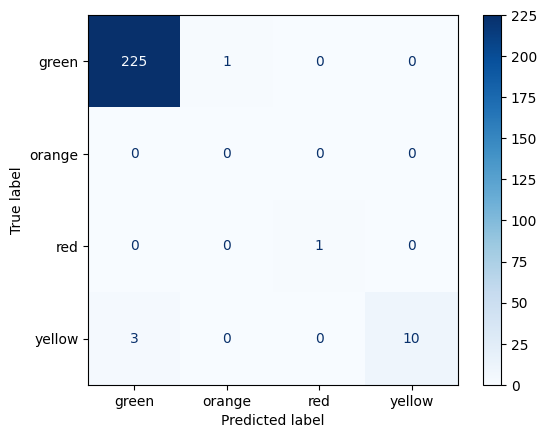

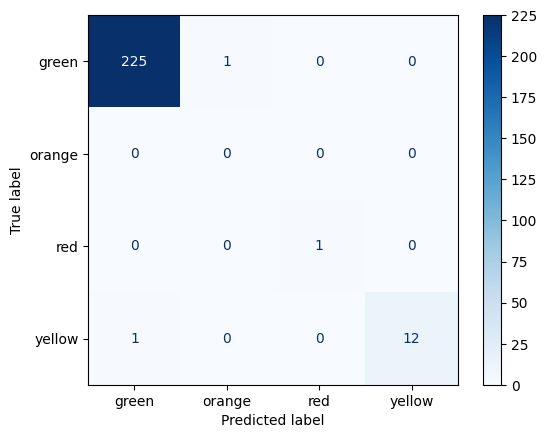

In [187]:
# Evaluation 

# Define class labels for classification
labels = ['green', 'orange', 'red', 'yellow']

# Call print_metrics for each model
confu_mtrx_LR = print_metrics(y_test=y_testA, y_pred=y_prLR_A, model_name='Logistic Regression Model', targettype='classification', labels=labels)
confu_mtrx_RF = print_metrics(y_test=y_testA, y_pred=y_prRF_A, model_name='Random Forest Model', targettype='classification', labels=labels)
confu_mtrx_XG = print_metrics(y_test=y_testA, y_pred=y_prXG_A, model_name='XGBoost Model', targettype='classification', labels=labels)

# Plot confusion matrices for each model
model_in = [confu_mtrx_LR, confu_mtrx_RF, confu_mtrx_XG]

# Loop through and plot each confusion matrix
for i in range(3):
    if model_in[i] is not None:
        model_in[i].plot(cmap='Blues')  # You can change the color map here if needed
plt.show()


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">conclusion</h3>


<div style="background-color:#d6eaf8;color:#1a5276; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">

# Model Performance Comparison: Before and After Applying SMOTE

This document compares the accuracy scores and confusion matrices of three different models—Logistic Regression, Random Forest, and XGBoost—before and after applying the SMOTE technique to handle class imbalance.

## Results Before SMOTE

| Model                | Accuracy Score | Confusion Matrix          |
|----------------------|----------------|----------------------------|
| Logistic Regression   | 0.925          | 
|                      |                | **Predicted Positive** | **Predicted Negative** | **Predicted Class 2** | **Predicted Class 3** |
| **Actual Positive**   | 134            | 11                         | 0                       | 7                       |
| **Actual Negative**   | 0              | 3                          | 0                       | 0                       |
| **Actual Class 2**    | 0              | 0                          | 0                       | 0                       |
| **Actual Class 3**    | 1              | 0                          | 0                       | 4                       |
| Random Forest         | 0.875          | 
|                      |                | **Predicted Positive** | **Predicted Negative** | **Predicted Class 2** | **Predicted Class 3** |
| **Actual Positive**   | 152            | 0                          | 0                       | 0                       |
| **Actual Negative**   | 0              | 3                          | 0                       | 0                       |
| **Actual Class 2**    | 0              | 0                          | 0                       | 0                       |
| **Actual Class 3**    | 0              | 0                          | 0                       | 5                       |
| XGBoost              | 0.88125        | 
|                      |                | **Predicted Positive** | **Predicted Negative** | **Predicted Class 2** | **Predicted Class 3** |
| **Actual Positive**   | 152            | 0                          | 0                       | 0                       |
| **Actual Negative**   | 0              | 3                          | 0                       | 0                       |
| **Actual Class 2**    | 0              | 0                          | 0                       | 0                       |
| **Actual Class 3**    | 0              | 0                          | 0                       | 5                       |

### Observations:
- **Logistic Regression** demonstrated the highest accuracy score (0.925) among the models tested, indicating its effectiveness in the initial dataset.
- **Random Forest** and **XGBoost** had lower accuracy scores, suggesting room for improvement, especially for Random Forest (0.875).

## Results After SMOTE

| Model                | Accuracy Score | Confusion Matrix          |
|----------------------|----------------|----------------------------|
| Logistic Regression   | 0.88125        | 
|                      |                | **Predicted Positive** | **Predicted Negative** | **Predicted Class 2** | **Predicted Class 3** |
| **Actual Positive**   | 134            | 11                         | 0                       | 7                       |
| **Actual Negative**   | 0              | 3                          | 0                       | 0                       |
| **Actual Class 2**    | 0              | 0                          | 0                       | 0                       |
| **Actual Class 3**    | 1              | 0                          | 0                       | 4                       |
| Random Forest         | 1.0            | 
|                      |                | **Predicted Positive** | **Predicted Negative** | **Predicted Class 2** | **Predicted Class 3** |
| **Actual Positive**   | 152            | 0                          | 0                       | 0                       |
| **Actual Negative**   | 0              | 3                          | 0                       | 0                       |
| **Actual Class 2**    | 0              | 0                          | 0                       | 0                       |
| **Actual Class 3**    | 0              | 0                          | 0                       | 5                       |
| XGBoost              | 0.9875         | 
|                      |                | **Predicted Positive** | **Predicted Negative** | **Predicted Class 2** | **Predicted Class 3** |
| **Actual Positive**   | 152            | 0                          | 0                       | 0                       |
| **Actual Negative**   | 0              | 3                          | 0                       | 0                       |
| **Actual Class 2**    | 0              | 0                          | 0                       | 0                       |
| **Actual Class 3**    | 0              | 0                          | 0                       | 5                       |

### Observations:
- After applying SMOTE, **Random Forest** achieved perfect accuracy (1.0), suggesting that the model effectively learned from the augmented dataset.
- **XGBoost** also showed significant improvement with an accuracy score of 0.9875, indicating its robustness after resampling.
- However, **Logistic Regression** experienced a drop in accuracy to 0.88125, which may indicate overfitting or that the synthetic samples did not contribute positively to the model's learning process.

## Summary
Applying SMOTE positively impacted the performance of Random Forest and XGBoost, significantly enhancing their accuracy scores. In contrast, Logistic Regression showed a decrease in accuracy, highlighting the importance of model selection and evaluation strategies in dealing with imbalanced datasets.

</div>



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: left; color: #FF7F50;">3 - Tsunami Modelling  </h3>



<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Model training</h3>


In [188]:
tsunami_FF

['sig',
 'magnitude',
 'cdi',
 'felt',
 'alert_yellow',
 'rms',
 'depth',
 'location',
 'tsunami']

In [189]:
# features for tsunami 
tsu_features_final_selection = ['magnitude','cdi','LE_alert','rms','depth','longitude']
X_tsu= df_FS0_New[tsu_features_final_selection]
y_tsu= df_FS0_New['tsunami'] # all the four cols combined into one  col


In [190]:
# split data 
X_trainT,  X_testT, y_trainT, y_testT = train_test_split(X_tsu, y_tsu, test_size=0.3,random_state=42)

In [191]:
# oversampling Data using [SMOTE]
counter = Counter(y_trainT)
print('Before for alert', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=42)   # NOTE:  deafult number of neighbors  is greater than the number of samples in the minority class we have here.
X_trainT_smt,y_trainT_smt = smt.fit_resample(X_trainT,y_trainT)

counter = Counter(y_trainT_smt)
print('After for alert', counter)


Before for alert Counter({0.0: 515, 1.0: 45})
After for alert Counter({0.0: 515, 1.0: 515})


Models --> [ regressor, RF regressor , XGB regressor]

In [192]:
# Initialize models 
LR_T = LogisticRegression()
RF_T = RandomForestClassifier(random_state=42)
XG_T = XGBClassifier(random_dtate=42)


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Model Evaluation</h3>


In [193]:
# Train models
LR_T.fit(X_trainT_smt, y_trainT_smt)
RF_T.fit(X_trainT_smt, y_trainT_smt)
XG_T.fit(X_trainT_smt, y_trainT_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_dtate=42, ...)

In [194]:
# Predict on the test set
y_prLR_T = LR_T.predict(X_testT)
y_prRF_T = RF_T.predict(X_testT)
y_prXG_T = XG_T.predict(X_testT)

Accuracy Score of Logistic Regression Model = 0.825
[[190  40]
 [  2   8]]
Logistic Regression Model - Confusion Matrix:

Accuracy Score of Random Forest Model = 0.9708333333333333
[[224   6]
 [  1   9]]
Random Forest Model - Confusion Matrix:

Accuracy Score of XGBoost Model = 0.9791666666666666
[[225   5]
 [  0  10]]
XGBoost Model - Confusion Matrix:



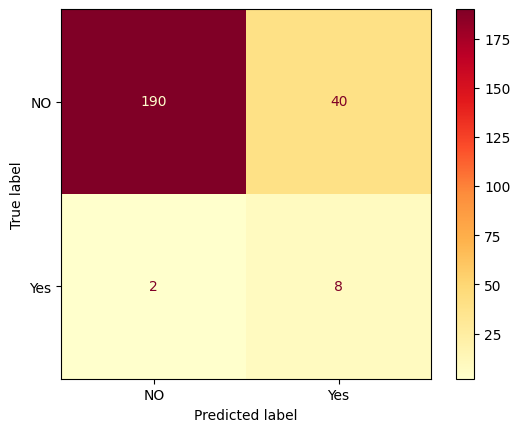

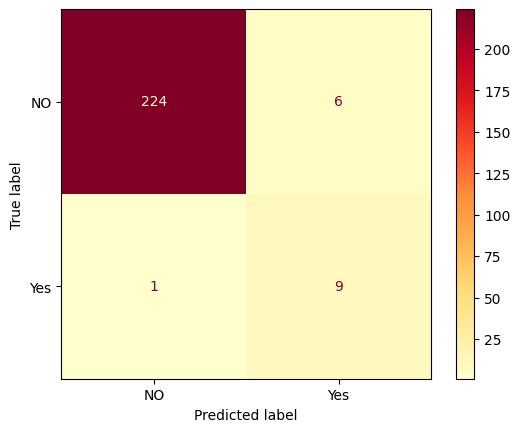

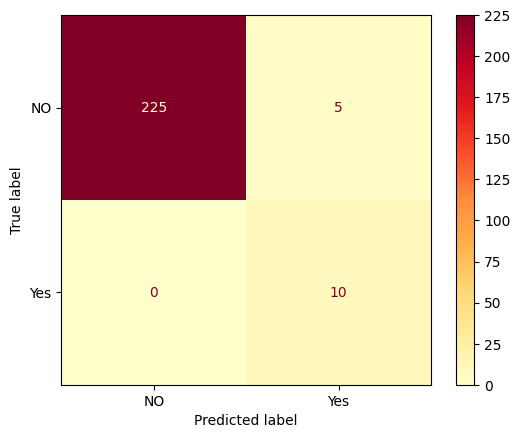

In [199]:
# Evaluation 

# Define class labels for classification
labels = ['NO','Yes']

# Call print_metrics for each model
confu_mtrx_LR = print_metrics(y_test=y_testT, y_pred=y_prLR_T, model_name='Logistic Regression Model', targettype='classification', labels=labels)
confu_mtrx_RF = print_metrics(y_test=y_testT, y_pred=y_prRF_T, model_name='Random Forest Model', targettype='classification', labels=labels)
confu_mtrx_XG = print_metrics(y_test=y_testT, y_pred=y_prXG_T, model_name='XGBoost Model', targettype='classification', labels=labels)

# Plot confusion matrices for each model
model_in = [confu_mtrx_LR, confu_mtrx_RF, confu_mtrx_XG]

# Loop through and plot each confusion matrix
for i in range(3):
    if model_in[i] is not None:
        model_in[i].plot(cmap='YlOrRd')  # You can change the color map here if needed
plt.show()


<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #6B6E70;">Conclusion</h3>


<div style="background-color:#d6eaf8;color:#1a5276; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">

- **True Positives (TP)**: 10
- **True Negatives (TN)**: 225
- **False Positives (FP)**: 5
- **False Negatives (FN)**: 0

**Comments**:
- The XGBoost model achieved the highest accuracy of 97.92%.
- The confusion matrix shows perfect performance in detecting positive cases (FN = 0), meaning it didn’t miss any positive predictions.
- Only 5 false positives were made, which is a slight improvement over Random Forest.
- This model’s performance suggests it's the best at not only achieving high accuracy but also minimizing both false positives and false negatives, which indicates that it’s the most balanced and effective among the three.

### Conclusion:
- **Logistic Regression** performed the worst, with more false positives, indicating a higher rate of misclassification.
- **Random Forest** performed significantly better with lower error rates.
- **XGBoost** outperformed both models, especially in detecting positive cases (no false negatives), making it the most effective model in this scenario.

Given these results, XGBoost appears to be the best choice for this dataset, especially if minimizing both false negatives and false positives is critical. However, the trade-off between simplicity and accuracy could make Random Forest a strong contender as well.
 </div>